# Vehicle Sales Analysis

Source: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

## Objective

Market Analysis: Researchers and analysts can utilize this dataset to study trends in the automotive market, including pricing fluctuations based on factors such as vehicle condition and mileage.

# Imports

In [1]:
# For data manipulation
import numpy as np
import pandas as pd




In [2]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

**Load Dataset**

In [4]:
# Load dataset into a dataframe
# df = pd.read_csv('', index_col = 0) | use this to remove index column
df = pd.read_csv('car_prices.csv')


# Display first few rows of the dataframe
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Data Dictionary** 

Variable  |Description |
-----|-----|
Vehicle Details |Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.|
Transaction Information | Provides insights into the sales transactions, including selling prices and sale dates.|
Market Trends | MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.|
Condition and Mileage | Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.|

# Data Exploration 

**Deliverables**
- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

### Statistics summary

In [5]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


**df.info**

In [6]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


*Shape*
- `(558837,16)`
- Rows = `558837` = individual cars 
- Columns = `16` = metadata about each car

*Data Types*
- What are the data types of various columns?
- `11` Categorical Variables (object):` 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller','saledate'`
- `5` Numerical Variables (float64/int64): `'year', 'condition', 'odometer', 'mmr', 'sellingprice'`

*Misc.*
- `13` columns contain null values

**Size of Data**

In [7]:
# How large the dataset is. Total values across the whole data
df.size

8941392

### For categorical, find unique values

### `make`

In [8]:
# Count number of unique values 
num_unique_values = df['make'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df['make'].sort_values(ascending = True).unique()

Number of unique values: 96


array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
       'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram',
       'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
       'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream',
       'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet',
       'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk',
       'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk',
       'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln',
       'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b',
       'mercury', 'mitsubish

> There's duplicate makes with different formatting

- 'volkswagen','vw',
- 'Suzuki','suzuki', 
-  'subaru', 'Subaru', 
- 'Porsche','porsche',
- 'Pontiac',  'pontiac',
- 'plymouth','Plymouth',
- 'Oldsmobile','oldsmobile'
- Mitsubishi','mitsubishi', 
- 'mercury','Mercury',
- 'Maserati', 'maserati'
- 'Hyundai','hyundai','hyundai tk',
- 'Honda','honda',
- 'ford',  'Ford',
- 'acura', 'Acura'
- 'Audi','audi'
- 'BMW', 'bmw'
- 'Buick', 'buick', 
- 'Lincoln', 'lincoln'
- 'Lexus', 'lexus'
- 'Toyota', 'toyota',
- 'GMC', gmc truck','gmc',
- 'Mercedes-Benz', 'mercedes','mercedes-b', 
- 'mazda','Mazda','mazda tk',
- 'land rover','land rover', 'landrover',
- 'pontiac', 'Pontiac'
- 'ford tk', 'ford truck', 'ford', 
- 'chevrolet', 'Chevrolet', 'chev truck',
- 'Cadillac', 'cadillac',
- 'nissan',  'Nissan', 
- 'Chrysler','chrysler',
- 'Dodge','dodge', 'dodge tk',
- 



- What is `dot`, `geo`?
 

### `model`

In [9]:
# Count number of unique values 
num_unique_values = df['model'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df['model'].sort_values(ascending = True).unique()

Number of unique values: 973


array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ATS', 'Acadia',
       'Accent', 'Accord', 'Accord Crosstour', 'Accord Hybrid', 'Achieva',
       'ActiveHybrid 5', 'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio',
       'Alero', 'Altima', 'Altima Hybrid', 'Amanti', 'Amigo', 'Armada',
       'Ascender', 'Aspen', 'Aspire', 'Astra', 'Astro', 'Astro Cargo',
       'Au

### `trim`


In [10]:
# Count number of unique values 
num_unique_values = df['trim'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
list(df['trim'].sort_values(ascending = True).unique())

Number of unique values: 1963


['!',
 '& coun fwd',
 '& coun fwd limited',
 '& coun fwd lx',
 '& country lx',
 '(1999.5) XE',
 '+',
 '1',
 '1.6',
 '1.6 Base',
 '1.6 S',
 '1.6 S Plus',
 '1.6 SL',
 '1.6 SV',
 '1.8',
 '1.8 Base',
 '1.8 Krom',
 '1.8 S',
 '1.8 S Krom Edition',
 '1.8 SL',
 '1.8 TFSI Premium',
 '1.8 TFSI Premium Plus',
 '1.8T',
 '1.8T Avant quattro',
 '1.8T Classic',
 '1.8T quattro',
 '1.9',
 '10th Anniversary',
 '128i',
 '128i SULEV',
 '135i',
 '135is',
 '150 Low Roof',
 '1500',
 '1500 4x2',
 '1500 4x2 cr sle',
 '1500 4x2 cr sle1',
 '1500 4x2 ex sle',
 '1500 4x2 slt',
 '1500 4x4 cr slt',
 '1500 4x4 ex sle',
 '1500 4x4 v8 slt',
 '1500 High Roof',
 '1500 LS',
 '1500 LT',
 '1500 LT1',
 '1500 LTZ',
 '1500 Low Roof',
 '1500 Maxi',
 '1500 S',
 '1500 SLE',
 '1500 SLT',
 '1500 SV',
 '1500 awd cr denali',
 '1500 base',
 '1500 lramie slt',
 '1794',
 '1794 FFV',
 '180hp',
 '180hp quattro',
 '190E 2.3',
 '1LS Fleet',
 '1LT',
 '1LT Fleet',
 '1SS',
 '2',
 '2+2',
 '2.0 S',
 '2.0 SL',
 '2.0 SR',
 '2.0 TDI Premium',
 '2.0

> possible error with cells where trim is `!`

### `body`


In [11]:
# Count number of unique values 
num_unique_values = df['body'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df['body'].sort_values(ascending = True).unique()

Number of unique values: 87


array(['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon',
       'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab',
       'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab',
       'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible',
       'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe',
       'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback',
       'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'Navitgation',
       'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab',
       'Ram Van', 'Regular Cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew',
       'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab',
       'access cab', 'beetle convertible', 'cab plus 4', 'club cab',
       'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe',
       'cts wagon', 'cts-v coupe', 'double cab', 'e-series van',
       'elantra coupe', 'extended cab', 'g convertible', 'g coupe',
       'g sedan', 'g37 convertib

> Found Duplicates

- Access Cab',  'access cab',
- 'Beetle Convertible', 'beetle convertible', 
- 'CTS Coupe', 'cts coupe',
- 'CTS Wagon','cts wagon',
- 'CTS-V Coupe','cts-v coupe'
- 'CTS-V Wagon', 
- 'Cab Plus 4', 'cab plus 4',
- 'Club Cab', 'club cab',
- 'Convertible', 'convertible', 
- 'Coupe', coupe
- 'Crew Cab', crew cab'
- 'CrewMax Cab', 'crewmax cab',
- 'Double Cab','double cab',
- 'E-Series Van',  'e-series van',
- 'Elantra Coupe', 'elantra coupe', 
- 'Extended Cab', 'extended cab', 
- 'G Convertible', 'g convertible',
- 'G Coupe', 'g coupe'
- 'G Sedan', 'g sedan', 
- 'G37 Convertible','g37 convertible',
- 'G37 Coupe','g37 coupe',
- 'Genesis Coupe', 'genesis coupe',
- 'GranTurismo Convertible', 'granturismo convertible',
- 'Hatchback','hatchback'
- 'King Cab', 'king cab',
- 'Koup',  'koup',
- 'Mega Cab',  'mega cab',
- 'Minivan',  'minivan'
- 'Promaster Cargo Van', 'promaster cargo van', 
- 'Q60 Convertible', 'q60 convertible',
- 'Q60 Coupe',  'q60 coupe',
- 'Quad Cab','quad cab',
- 'Regular Cab', 'regular cab', 'regular-cab',
- 'SUV', suv
- 'Sedan', 'sedan',
- 'SuperCab',  'supercab',
- 'SuperCrew','supercrew', 
- 'TSX Sport Wagon', 'tsx sport wagon',
- 'Transit Van', 'transit van',
- 'Van',  'van',
- 'Wagon', 'wagon'
- 'Xtracab', 'xtracab'


> rename to just van for `'Ram Van`

### `transmission`


In [12]:
# Count number of unique values 
num_unique_values = df['transmission'].nunique()
print(f'Number of unique values: {num_unique_values}')

#Find out how many types exists for categorical column
df['transmission'].sort_values(ascending = True).unique()

Number of unique values: 4


array(['Sedan', 'automatic', 'manual', 'sedan', nan], dtype=object)

> Duplicates

- Sedan, sedan

> But sedan is not transmission type. Since it's a small percent of total data, should look into turning it into NaN

### `state`


In [13]:
# Count number of unique values 
num_unique_values = df['state'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df['state'].sort_values(ascending = True).unique()

Number of unique values: 64


array(['3vwd17aj0fm227318', '3vwd17aj2fm258506', '3vwd17aj2fm261566',
       '3vwd17aj2fm285365', '3vwd17aj3fm259017', '3vwd17aj3fm276741',
       '3vwd17aj4fm201708', '3vwd17aj4fm236636', '3vwd17aj5fm206111',
       '3vwd17aj5fm219943', '3vwd17aj5fm221322', '3vwd17aj5fm225953',
       '3vwd17aj5fm268964', '3vwd17aj5fm273601', '3vwd17aj5fm297123',
       '3vwd17aj6fm218641', '3vwd17aj6fm231972', '3vwd17aj7fm218440',
       '3vwd17aj7fm222388', '3vwd17aj7fm223475', '3vwd17aj7fm229552',
       '3vwd17aj7fm326640', '3vwd17aj8fm239622', '3vwd17aj8fm298895',
       '3vwd17aj9fm219766', '3vwd17ajxfm315938', 'ab', 'al', 'az', 'ca',
       'co', 'fl', 'ga', 'hi', 'il', 'in', 'la', 'ma', 'md', 'mi', 'mn',
       'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns', 'nv', 'ny', 'oh', 'ok',
       'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn', 'tx', 'ut', 'va', 'wa',
       'wi'], dtype=object)

> Data Entry errors
- looks like some vin was captured in this column 
- search for entries starting with `3vwd17a`

 ### `color`


In [14]:
# Count number of unique values 
num_unique_values = df['color'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df['color'].unique()

Number of unique values: 46


array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

> colors have numeric data, may need to convert

### `interior`


In [15]:
# Count number of unique values 
num_unique_values = df['interior'].nunique()
print(f'Number of unique values: {num_unique_values}')

# Find out how many types exists for categorical column
df['interior'].unique()

Number of unique values: 17


array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

> convert `-` to Nan

## Data Structuring

### *split `saledate` column*

In [16]:
# create new dataframe
df1 = df.copy()
df1.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [17]:
# filter by saledate column to review the data between spaces
df['saledate'].head(2)

0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
Name: saledate, dtype: object

In [19]:
# create new columns to store split data from `saledate`
df1[['sale_weekday','sale_month','sale_day','sale_year','sale_time','sale_time_zone','sale_time_zone2']] = df['saledate'].str.split(' ',expand=True)
df1.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_weekday,sale_month,sale_day,sale_year,sale_time,sale_time_zone,sale_time_zone2
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00,GMT-0800,(PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Tue,Dec,16,2014,12:30:00,GMT-0800,(PST)


> Drop `saledate` column

In [21]:
df1= df1.drop(columns=['saledate','sale_time','sale_time_zone','sale_time_zone2'])


KeyError: "['saledate', 'sale_time', 'sale_time_zone', 'sale_time_zone2'] not found in axis"

In [22]:
df1.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15,2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,18,2014


In [23]:
df_ver = 'current: df1 = split saledate column'
df_ver

'current: df1 = split saledate column'

### *`make` column : clean duplicate names, and rename some*

In [24]:
# create a dictionary of replacements
make_replacements = {
                    'Volvo': 'volvo',
                    'vw': 'volkswagen',
                    'Jaguar': 'jaguar',
                    'Volkswagen': 'volkswagen',
                    'Suzuki':'suzuki', 
                    'Subaru': 'subaru', 
                    'Porsche': 'porsche',
                    'Pontiac': 'pontiac',
                    'Plymouth':'plymouth',
                    'Oldsmobile':'oldsmobile',
                    'Mitsubishi':'mitsubishi', 
                    'Mercury':'mercury',
                    'Maserati': 'maserati',
                    'Hyundai': 'hyundai',
                    'hyundai tk': 'hyundai',
                    'Honda':'honda',
                    'Ford':  'ford',
                    'Acura': 'acura',
                    'Audi':'audi',
                    'BMW': 'bmw',
                    'Buick': 'buick', 
                    'Lincoln': 'lincoln',
                    'Lexus': 'lexus',
                    'Toyota': 'toyota',
                    'GMC': 'gmc',
                    'gmc truck':'gmc',
                    'Mercedes-Benz': 'mercedes',
                    'mercedes-b': 'mercedes',
                    'Mazda':'mazda',
                    'mazda tk': 'mazda',
                    'landrover':  'land rover',
                    'Pontiac': 'pontiac',
                    'ford tk': 'ford', 
                    'ford truck': 'ford', 
                    'Chevrolet': 'chevrolet',
                    'chev truck': 'chevrolet',
                    'Cadillac': 'cadillac',
                    'Nissan':  'nissan', 
                    'Chrysler':'chrysler',
                    'Dodge':'dodge', 
                    'dodge tk':'dodge',
                    'Kia':'kia',
                    'Jeep': 'jeep',
                    'MINI':'mini',
                    'FIAT':'fiat',
                    'Ferrari': 'ferrari',
                    'Ram': 'ram',
                    'Bentley':'bentley',
                    'Saturn':'saturn',
                    'HUMMER': 'hummer',
                    'Saab':'saab',
                    'Rolls-Royce':'rolls royce',
                    'Daewoo':'daewoo',
                    'Isuzu': 'isuzu',
                    'Geo': 'geo',
                    'Tesla':'tesla',
                    'Aston Martin': 'aston martin',
                    'Fisker': 'fisker',
                    'Lamborghini':'lamborghini',
                    'Lotus':'lotus',
                    'Infiniti':'infiniti',
                    'Land Rover':'land rover',
                    'Scion':'scion',
                    'dot':'dodge'
                     }

# replace values using the .map() method
df1['make'] = df1['make'].map(make_replacements).fillna(df1['make'])

# print the DataFrame
df1['make'].sort_values(ascending=True).unique()

array(['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw',
       'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge',
       'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda',
       'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus',
       'maserati', 'mazda', 'mercedes', 'mercury', 'mini', 'mitsubishi',
       'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram',
       'rolls royce', 'saab', 'saturn', 'scion', 'smart', 'subaru',
       'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', nan],
      dtype=object)

### *`model` column : clean duplicate names, and rename some*

In [25]:
# create a dictionary of replacements
model_replacements = { 
                     'A4':'a4',
                     'A6': 'a6',
                     'Accord': 'accord',
                     'Alero': 'alero',
                     'Astro': 'astro',
                     'Avalon': 'avalon',
                     'Avenger': 'avenger',
                     'Aveo': 'aveo',
                     'Beetle': 'beetle',
                     'Borrego': 'borrego',
                     'Breeze': 'breeze',
                     'CX-7': 'cx-7',
                     'Camaro': 'camaro',
                     'Camry': 'camry',
                     'Caravan': 'caravan',
                     'Cavalier': 'cavalier',
                     'Century': 'century',
                     'Charger': 'charger',
                     'Cherokee': 'cherokee',
                     'Civic': 'civic',
                     'Civic del Sol': 'cobalt',
                     'Classic': 'colorado',
                     'Commander': 'comm',
                     'Compass': 'compass',
                     'Concorde': 'concorde',
                     'Corolla': 'corolla',
                     'Corsica': 'corsica',
                     'Corvette': 'corvette',
                     'Cougar': 'cougar',
                     'Crossfire': 'crossfire',
                     'Crown Victoria': 'crown',
                     'Cruze': 'cruze',
                     'DTS': 'dts',
                     'Dakota': 'dakota',
                     'Discovery': 'discovery',
                     'Durango': 'durango',
                     'E-150': 'e150',
                     'E-250': 'e250',
                     'E-350': 'e350',
                     'Elantra': 'elantra',
                     'Endeavor': 'endeavor',
                     'Envoy': 'envoy',
                     'Equinox': 'equinox',
                     'Escalade': 'escalade',
                     'Escape': 'escape',
                     'EuroVan': 'eurovan',
                     'Excursion': 'excurs',
                     'Expedition': 'expedition',
                     'expedit': 'expedition',
                     'expeditn': 'expedition',
                     'Explorer': 'explorer',
                     'F-150': 'f150',
                     'F-250': 'f250',
                     'F-350 Super Duty': 'f350',
                     'Focus': 'focus',
                     'Forester': 'forester',
                     'Freestyle': 'freestyle',
                     'G5': 'g5',
                     'G6': 'g6',
                     'Galant': 'galant',
                     'Golf': 'golf',
                     'GranSport': 'grand',
                     'GranTurismo': 'gx',
                     'Impala': 'impala',
                     'Intrepid': 'intrepid',
                     'Intrigue': 'intrigue',
                     'Jetta': 'jetta',
                     'Journey': 'journey',
                     'LR3': 'lr3',
                     'LaCrosse': 'lacrosse',
                     'Lancer': 'lancer',
                     'Legacy': 'legacy',
                     'Legend': 'lumina',
                     'Magnum': 'magnum',
                     'Malibu': 'malibu',
                     'Matrix': 'matrix',
                     'Mazda3': 'mazda3',
                     'Mazda5': 'mazda5',
                     'Mazda6': 'mazda6',
                     'Montana': 'montana',
                     'Mountaineer': 'mountaineer',
                     'mountnr': 'mountaineer',
                     'Neon': 'neon',
                     'Odyssey': 'odyssey',
                     'Optima': 'optima',
                     'Pacifica': 'pacifica',
                     'Passat': 'passat',
                     'Pathfinder': 'pathfinder',
                     'pathfind': 'pathfinder',
                     'Patriot': 'patriot',
                     'Pickup': 'pickup',
                     'Pilot': 'pilot',
                     'Quattroporte': 'quattroporte',
                     'Quest': 'quest',
                     'RL': 'rl',
                     'RS 7': 'rr',
                     'RX-8': 'rx8',
                     'Rainier': 'rainier',
                     'Ram Cargo': 'ram',
                     'Ram Pickup 3500': 'ram3500',
                     'Range Rover': 'rangerover',
                     'range': 'rangerover',
                     'ranger': 'rangerover',
                     'Range Rover Sport': 'rrs',
                     'Regal': 'regal',
                     'Ridgeline': 'ridgelin',
                     'Rio': 'rio',
                     'Routan': 'routan',
                     'S-10': 's10',
                     'SRX': 'srx',
                     'STS': 'sts',
                     'SX4': 'sx4',
                     'Safari': 'safari',
                     'Santa Fe': 'santa',
                     'Savana': 'savana',
                     'Sebring': 'sebring',
                     'Sienna': 'sienna',
                     'Sierra 1500': 'siera',
                     'Silhouette': 'silhouette',
                     'Sonic': 'sonic',
                     'Sonoma': 'sonoma',
                     'Sportage': 'sportage',
                     'Sprinter': 'sprinter',
                     'Stratus': 'stratus',
                     'Suburban': 'suburban',
                     'subrbn': 'suburban',
                     'Tahoe': 'tahoe',
                     'Taurus': 'taurus',
                     'Thunderbird': 'thunderbird',
                     'Town Car': 'town',
                     'Town and Country': 'twn&country',
                     'twn/cntry': 'twn&country',
                     'Tribute': 'tribute',
                     'Tucson': 'tucson',
                     'Tundra': 'tundra',
                     'Uplander': 'uplander',
                     'uplandr': 'uplander',
                     'Venture': 'venture',
                     'Versa': 'versa',
                     'Vibe': 'vibe',
                     'Villager': 'villager',
                     'Voyager': 'voyager',
                     'Windstar': 'windstar',
                     'Wrangler': 'wrangler',
                     'X3': 'x3',
                     'Yaris': 'yaris',
                     'Yukon': 'yukon'

                     }

# replace values using the .map() method
df1['model'] = df1['model'].map(model_replacements).fillna(df1['model'])

# print the DataFrame
df1['model'].sort_values(ascending=True).unique()

array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A5', 'A7', 'A8', 'ATS', 'Acadia', 'Accent',
       'Accord Crosstour', 'Accord Hybrid', 'Achieva', 'ActiveHybrid 5',
       'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio', 'Altima',
       'Altima Hybrid', 'Amanti', 'Amigo', 'Armada', 'Ascender', 'Aspen',
       'Aspire', 'Astra', 'Astro Cargo', 'Aura', 'Aura Hybrid', 'Aurora',
       'Avalanche

### *`body` column : clean duplicate names, and rename some*

In [26]:

# create a dictionary of replacements
body_replacements = {'Access Cab':  'access cab',
                    'CTS Coupe': 'cts coupe',
                    'Beetle Convertible': 'beetle convertible', 
                    'CTS Wagon':'cts wagon',
                    'CTS-V Coupe':'cts-v coupe',
                    'CTS-V Wagon': 'cts-v wagon',
                    'Cab Plus 4': 'cab plus 4',
                    'Club Cab': 'club cab',
                    'Convertible': 'convertible', 
                    'Coupe': 'coupe',
                    'Crew Cab': 'crew cab',
                    'CrewMax Cab': 'crewmax cab',
                    'Double Cab':'double cab',
                    'E-Series Van':  'e-series van',
                    'Elantra Coupe': 'elantra coupe', 
                    'Extended Cab': 'extended cab', 
                    'G Convertible': 'g convertible',
                    'G Coupe': 'g coupe',
                    'G Sedan': 'g sedan', 
                    'G37 Convertible':'g37 convertible',
                    'G37 Coupe':'g37 coupe',
                    'Genesis Coupe': 'genesis coupe',
                    'GranTurismo Convertible': 'granturismo convertible',
                    'Hatchback':'hatchback',
                    'King Cab': 'king cab',
                    'Koup':  'koup',
                    'Mega Cab':  'mega cab',
                    'Minivan':  'minivan',
                    'Promaster Cargo Van': 'promaster cargo van', 
                    'Q60 Convertible': 'q60 convertible',
                    'Q60 Coupe':  'q60 coupe',
                    'Quad Cab':'quad cab',
                    'Regular Cab': 'regular cab', 
                    'regular-cab': 'regular cab',
                    'SUV': 'suv',
                    'Sedan': 'sedan',
                    'SuperCab':  'supercab',
                    'SuperCrew':'supercrew', 
                    'TSX Sport Wagon': 'tsx sport wagon',
                    'Transit Van': 'transit van',
                    'Van':  'van',
                    'Wagon': 'wagon',
                    'Xtracab': 'xtracab',
                    'Cab Plus':'cab plus',
                    'Navitgation':'navitgation',
                    'Ram Van':'ram van'
                     }

# replace values using the .map() method
df1['body'] = df1['body'].map(body_replacements).fillna(df1['body'])

# print the DataFrame
df1['body'].sort_values(ascending=True).unique()

array(['access cab', 'beetle convertible', 'cab plus', 'cab plus 4',
       'club cab', 'convertible', 'coupe', 'crew cab', 'crewmax cab',
       'cts coupe', 'cts wagon', 'cts-v coupe', 'cts-v wagon',
       'double cab', 'e-series van', 'elantra coupe', 'extended cab',
       'g convertible', 'g coupe', 'g sedan', 'g37 convertible',
       'g37 coupe', 'genesis coupe', 'granturismo convertible',
       'hatchback', 'king cab', 'koup', 'mega cab', 'minivan',
       'navitgation', 'promaster cargo van', 'q60 convertible',
       'q60 coupe', 'quad cab', 'ram van', 'regular cab', 'sedan',
       'supercab', 'supercrew', 'suv', 'transit van', 'tsx sport wagon',
       'van', 'wagon', 'xtracab', nan], dtype=object)

### for `transmission` column : sedan is incorrect type

In [27]:
# Create a Boolean mask of where transmission = sedan
mask_tsm = (df1['transmission'] == 'sedan') | (df1['transmission'] == 'Sedan')
df1[mask_tsm].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None
417835,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None
421289,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None
424161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,Sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None
427040,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,Sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None


In [28]:
# create a dictionary of replacements
transmission_replacements = {'Sedan':  'sedan'}

# replace values using the .map() method
df1['transmission'] = df1['transmission'].map(transmission_replacements).fillna(df1['transmission'])

# print the DataFrame
df1['transmission'].sort_values(ascending=True).unique()

array(['automatic', 'manual', 'sedan', nan], dtype=object)

In [29]:
# Create a Boolean mask to separate rows where transmission equals sedan 
mask_tsm2 = (df1['transmission'] == 'sedan')
df1[mask_tsm2].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None
417835,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None
421289,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None
424161,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None
427040,2015,volkswagen,jetta,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None


In [30]:
# create a new df2 
df2 = df1.copy()

# compare shape of both df1 and df2
print(df1.shape)
print(df2.shape)

(558837, 19)
(558837, 19)


In [31]:
# create variable to store rows where transmission = sedan
drop_rows = df2[df2['transmission'] == 'sedan'].index

# drop all rows with transimision = sedan from df2
df2.drop(drop_rows, inplace=True)

# compare shape of both df1 and df2
print(df1.shape)
print(df2.shape)

(558837, 19)
(558811, 19)


> df2 should have less rows than df1 since rows where transmision = sedan are dropped

In [32]:
df_ver = 'current: df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'
df_ver

'current: df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'

#### Fix data errors where transmission = sedan 


##### 1. split first few columns from df1[mask]



In [33]:
#create a copy of the masked df
df_mask_subset = df1[mask_tsm2].copy()

In [34]:
# separate 'year','make','model' columns from subet because they are correct.
df_mask_left=df_mask_subset[['year','make','model']]
df_mask_left.head()


,year,make,model
408161,2015,volkswagen,jetta
417835,2015,volkswagen,jetta
421289,2015,volkswagen,jetta
424161,2015,volkswagen,jetta
427040,2015,volkswagen,jetta


In [35]:
# create df for right side columns where data is incorrect and
# needs to be shifted by dropping the first 3 columns that are correct

df_mask_right=df_mask_subset.drop(columns=['year','make','model'])
df_mask_right.head()

,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None
417835,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None
421289,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None
424161,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None
427040,SE PZEV w/Connectivity,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None


##### 2. shift columns to the left

In [36]:
df_mask_right = df_mask_right.shift(-1, axis=1)
df_mask_right.head()

,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None,None
417835,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None,None
421289,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None,None
424161,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None,None
427040,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None,None


##### 3. merge both left and right columns of mask together

In [37]:
df_merge = df_mask_left.merge(df_mask_right, right_index=True, left_index=True)
df_merge.head()

            

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
408161,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500,None,None,None,None
417835,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500,None,None,None,None
421289,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700,None,None,None,None
424161,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250,None,None,None,None
427040,2015,volkswagen,jetta,navitgation,sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300,None,None,None,None


In [38]:
# create a new df
df3 = df2.copy()
df3.shape

(558811, 19)

#### Add df_merge back to main df3 & validate 

In [39]:
# concat masked df to main df
df3 = pd.concat([df3, df_merge], axis=0)
df3.shape

(558837, 19)

> shape is now same as original 

In [40]:
# Find out how many types exists for categorical column
df3['transmission'].sort_values(ascending = True).unique()

array(['automatic', 'manual', nan], dtype=object)

> this confirms sedan is no longer an option and cell data is corrected

In [41]:
df_ver = 'current: df3 = tranmission rows cleaned and added back to df, df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'

### Check other columns with data errors

- state
- color

In [42]:
# Find out how many types exists for categorical column
df3['state'].sort_values(ascending = True).unique()

array(['ab', 'al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la',
       'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'ne', 'nj', 'nm', 'ns',
       'nv', 'ny', 'oh', 'ok', 'on', 'or', 'pa', 'pr', 'qc', 'sc', 'tn',
       'tx', 'ut', 'va', 'wa', 'wi', nan], dtype=object)

> state no longer shows vin data

In [43]:
# Find out how many types exists for categorical column
df3['color'].sort_values(ascending = True).unique()

array(['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold',
       'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple',
       'red', 'silver', 'turquoise', 'white', 'yellow', '—', nan],
      dtype=object)

> color no longer shows numeric data

### Convert `-` to Nan in `color` and `interior` 

In [44]:
mask_color = (df3['color'] == '—')
df3[mask_color].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
134,2013,infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap1dm302069,ca,37.0,21144.0,—,black,nissan infiniti lt,23100.0,24250.0,Thu,Dec,18,2014
154,2013,infiniti,G Coupe,G37 Sport,g coupe,automatic,jn1cv6ek5dm900518,ca,43.0,17523.0,—,black,nissan infiniti lt,25600.0,26500.0,Thu,Dec,18,2014
185,2013,infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap7dm300469,ca,41.0,19957.0,—,beige,nissan infiniti lt,23300.0,21750.0,Thu,Dec,18,2014
282,2013,infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6apxdm714281,ca,42.0,19729.0,—,black,nissan infiniti lt,23300.0,24500.0,Thu,Dec,18,2014
322,2013,infiniti,G Coupe,G37 Sport,g coupe,automatic,jn1cv6ek2dm922699,ca,41.0,13002.0,—,black,nissan infiniti lt,26100.0,26500.0,Thu,Dec,18,2014


In [45]:
df4 = df3.copy()
df4['color'].replace('—', np.nan,inplace=True)


C:\Users\tunhi\AppData\Local\Temp\ipykernel_16976\1768693922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['color'].replace('—', np.nan,inplace=True)


In [46]:
mask_color = (df4['color'] == '—')
df4[mask_color].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year


In [47]:
# check values for color
df4['color'].sort_values(ascending=True).unique()


array(['beige', 'black', 'blue', 'brown', 'burgundy', 'charcoal', 'gold',
       'gray', 'green', 'lime', 'off-white', 'orange', 'pink', 'purple',
       'red', 'silver', 'turquoise', 'white', 'yellow', nan], dtype=object)

> `-` is no longer listed

In [48]:
# change `-` to NaN for interior
df4['interior'].replace('—', np.nan,inplace=True)


C:\Users\tunhi\AppData\Local\Temp\ipykernel_16976\665968432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['interior'].replace('—', np.nan,inplace=True)


In [49]:
mask_int = (df4['interior'] == '—')
df4[mask_int].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year


In [50]:
# check if `-` is removed
df4['interior'].sort_values(ascending=True).unique()


array(['beige', 'black', 'blue', 'brown', 'burgundy', 'gold', 'gray',
       'green', 'off-white', 'orange', 'purple', 'red', 'silver', 'tan',
       'white', 'yellow', nan], dtype=object)

> `-` is longer listed

### `trim`: check `!` description

In [51]:
mask_trim = df4.loc[df4['trim'] == '!']
mask_trim.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
2261,2011,kia,Soul,!,wagon,automatic,kndjt2a20b7339570,ca,42.0,52846.0,green,black,kia motors finance,9275.0,11000.0,Tue,Dec,16,2014
2342,2011,kia,Soul,!,wagon,automatic,kndjt2a23b7344049,ca,33.0,59460.0,gray,black,santander consumer,9375.0,10000.0,Thu,Jan,08,2015
2746,2010,kia,Soul,!,wagon,NaN,kndjt2a20a7188597,ca,27.0,81113.0,green,black,primeritus remarketing/bank of hawaii,7750.0,7600.0,Wed,Dec,17,2014
2780,2010,kia,Soul,!,wagon,automatic,kndjt2a20a7702464,ca,21.0,99273.0,white,black,first investors servicing corp,6800.0,7300.0,Tue,Dec,16,2014
6696,2011,kia,Soul,!,wagon,automatic,kndjt2a27b7246206,ca,34.0,58744.0,orange,black,dtg operations inc,9125.0,8900.0,Thu,Dec,18,2014


> looks like all of these rows are Kia Soul cars, let's confirm

In [52]:
mask_trim.shape

(463, 19)

In [53]:
# filter mask_trim to get a count of all rows that have trim = ! and model = Soul 
df4.loc[(df4['trim'] == '!') & (df4['model'] == 'Soul')].shape

(463, 19)

> since the number of rows matches, all rows where trim = ! are for Kia Soul.

> a goole search shows this is a possible trim description for the Kia Soul. Therefore, let's leave it as is

In [54]:
# check shape for df4
df4.shape

(558837, 19)

In [55]:
df_ver = 'current: df4 = convert "-" in color and interior to nan. df3 = tranmission rows cleaned and added back to df, df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'

## Data Cleaning

### Missing Values

4 ways to handle missing values

1. you requested the missing values be filled in by the owner of the data. 
2. you delete the missing columns, rows, or values which would work best if the total count of missing data is relatively low. 
3. you create a NaN category. 
4. you derive new representative values such as taking the median or average of the values that aren't missing.

In [56]:
df.size

8941392

In [146]:
# Get a count of  missing values in dataframe
sum_missing = df4.isna().sum().sum()
print('Total count of missing values:', sum_missing)

percent_missing = 100*(df4.isna().sum().sum())/df.size
print(f'Total % of missing values: {percent_missing:.2f}%')


# Display missing values per column in dataframe
print('Missing values per column:')
df4.isna().sum()



Total count of missing values: 165278


Total % of missing values: 1.85%
Missing values per column:


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65356
vin                 0
state              26
condition       11794
odometer           94
color           25435
interior        17825
seller             26
mmr                12
sellingprice       12
sale_weekday       38
sale_month         38
sale_day           38
sale_year          38
dtype: int64

> `transmission` has the most NaN cells, most likely due to the saledate column


> 1.29% of cells are missing values.

#### Apply Boolean Mask

> make/models/trim can be inferred if we have 2 out of 3

In [58]:
# create a mask to see how many rows have no data for these 3 columns
mask_make_nan = df4.loc[df4['make'].isnull() & df4['model'].isnull() & df4['trim'].isnull() ]
mask_make_nan.shape

(10301, 19)

> there are 10301 rows where all 3 `make`, `model`, `trim` are null

> but there are several hundreds more null values in`model` and `trim`, let's check those rows

In [149]:
mask_make_nan = df4.loc[df4['make'].isnull() & df4['model'].notnull() & df4['trim'].notnull() ]
print(mask_make_nan.shape)


(0, 19)


No rows where make is missing but model and trim are available

In [150]:
mask_model_nan = df4.loc[df4['make'].notnull() & df4['model'].isnull() & df4['trim'].notnull() ]
print(mask_model_nan.shape)
mask_model_nan.head()

(98, 19)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
72,2014,bmw,NaN,750Li,sedan,automatic,wbaye8c59ed134514,ca,43.0,12172.0,black,black,financial services remarketing (lease),67000.0,66000.0,Thu,Dec,18,2014
31262,2014,bmw,NaN,750i,sedan,automatic,wbaya8c52ed825069,ga,44.0,4488.0,silver,black,global imports,67000.0,64200.0,Thu,Dec,18,2014
61951,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c57ed653381,oh,48.0,387.0,black,black,bmw na manheim new jersey,72000.0,72500.0,Tue,Dec,30,2014
61955,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c51ed142328,oh,46.0,414.0,white,NaN,bmw na manheim new jersey,72000.0,68500.0,Tue,Dec,30,2014
61956,2014,bmw,NaN,750i,sedan,automatic,wbaya8c55ed228269,oh,48.0,4796.0,NaN,NaN,bmw north america raa,66000.0,75000.0,Tue,Dec,30,2014


In [153]:
# find unique make from this mask
print(mask_model_nan['make'].unique())
print(mask_model_nan['trim'].unique())

['bmw' 'audi']
['750Li' '750i' '750Li xDrive' '2.0 TFSI Premium quattro' '750i xDrive'
 '650i xDrive']


In [62]:
# check with existing data from model 
df4['model'].sort_values(ascending=True).unique()

array(['1', '1 Series', '1500', '190-Class', '2 Series', '200', '200SX',
       '2500', '3', '3 Series', '3 Series Gran Turismo', '300',
       '300-Class', '3000GT', '300M', '300ZX', '300e', '320i', '323i',
       '328i', '350', '3500', '350Z', '350z', '360', '370Z', '4 Series',
       '4 Series Gran Coupe', '400-Class', '420-Class', '420sel', '42c',
       '458 Italia', '4Runner', '5 Series', '5 Series Gran Turismo',
       '500', '500-Class', '500L', '500e', '6', '6 Series',
       '6 Series Gran Coupe', '626', '7', '7 Series', '750i', '750li',
       '750lxi', '8 Series', '850', '9-2X', '9-3', '9-5', '9-7X', '911',
       '940', '960', 'A3', 'A5', 'A7', 'A8', 'ATS', 'Acadia', 'Accent',
       'Accord Crosstour', 'Accord Hybrid', 'Achieva', 'ActiveHybrid 5',
       'ActiveHybrid 7', 'ActiveHybrid X6', 'Aerio', 'Altima',
       'Altima Hybrid', 'Amanti', 'Amigo', 'Armada', 'Ascender', 'Aspen',
       'Aspire', 'Astra', 'Astro Cargo', 'Aura', 'Aura Hybrid', 'Aurora',
       'Avalanche

In [63]:
mask_model_nan.loc[(df4['trim'] == '750Li') | (df4['trim'] == '750i') | (df4['trim'] == '750Li xDrive') | (df4['trim'] == '750i xDrive') & (df4['model'].isnull()) ]



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year
72,2014,bmw,NaN,750Li,sedan,automatic,wbaye8c59ed134514,ca,43.0,12172.0,black,black,financial services remarketing (lease),67000.0,66000.0,Thu,Dec,18,2014
31262,2014,bmw,NaN,750i,sedan,automatic,wbaya8c52ed825069,ga,44.0,4488.0,silver,black,global imports,67000.0,64200.0,Thu,Dec,18,2014
61951,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c57ed653381,oh,48.0,387.0,black,black,bmw na manheim new jersey,72000.0,72500.0,Tue,Dec,30,2014
61955,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c51ed142328,oh,46.0,414.0,white,NaN,bmw na manheim new jersey,72000.0,68500.0,Tue,Dec,30,2014
61956,2014,bmw,NaN,750i,sedan,automatic,wbaya8c55ed228269,oh,48.0,4796.0,NaN,NaN,bmw north america raa,66000.0,75000.0,Tue,Dec,30,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545433,2015,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c57fd653897,oh,43.0,14133.0,black,tan,bmw north america raa,80000.0,75000.0,Tue,Jun,16,2015
545442,2015,bmw,NaN,750i xDrive,sedan,automatic,wbayb6c53fd225258,oh,39.0,9090.0,black,tan,bmw north america raa,72000.0,61500.0,Tue,Jun,30,2015
546744,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c50ed142059,oh,38.0,7394.0,black,black,bmw north america raa,60000.0,56000.0,Tue,Jun,16,2015
549010,2014,bmw,NaN,750Li xDrive,sedan,automatic,wbayf8c5xed142506,oh,44.0,943.0,blue,tan,bmw north america greer,64000.0,64500.0,Tue,Jun,16,2015


> Models for these trim are found on google

- '750Li' = '7 Series'
- '750i'  = '7 Series'
- '750Li xDrive' = '7 Series'
- '2.0 TFSI Premium quattro'= Q3
- '750i xDrive'= '7 Series'
- '650i xDrive' = '6 Series'

In [161]:
df4a = df4.copy()


In [162]:
# Replace missing model values with correct model found on google
df4a['model'] = df4a['model'].mask((df4a['trim'] =='750Li') & (df4a['model'].isnull()) ,'7 Series', inplace=True)
df4a['model'] = df4a['model'].mask((df4a['trim'] =='750i') & (df4a['model'].isnull()) ,'7 Series', inplace=True)
df4a['model'] = df4a['model'].mask((df4a['trim'] =='750Li xDrive') & (df4a['model'].isnull()) ,'7 Series', inplace=True)
df4a['model'] = df4a['model'].mask((df4a['trim'] =='750i xDrive') & (df4a['model'].isnull()) ,'7 Series', inplace=True)
df4a['model'] = df4a['model'].mask((df4a['trim'] =='650i xDrive') & (df4a['model'].isnull()) ,'6 Series', inplace=True)
df4a['model'] = df4a['model'].mask((df4a['trim'] =='2.0 TFSI Premium quattro') & (df4a['model'].isnull()) ,'Q3', inplace=True)


C:\Users\tunhi\AppData\Local\Temp\ipykernel_16976\71177576.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4a['model'] = df4a['model'].mask((df4a['trim'] =='750Li') & (df4a['model'].isnull()) ,'7 Series', inplace=True)
C:\Users\tunhi\AppData\Local\Temp\ipykernel_16976\71177576.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

#### Validate changes


In [163]:
df4a.loc[72]

year                                              2014
make                                               bmw
model                                             None
trim                                             750Li
body                                             sedan
transmission                                 automatic
vin                                  wbaye8c59ed134514
state                                               ca
condition                                         43.0
odometer                                       12172.0
color                                            black
interior                                         black
seller          financial services remarketing (lease)
mmr                                            67000.0
sellingprice                                   66000.0
sale_weekday                                       Thu
sale_month                                         Dec
sale_day                                            18
sale_year 

In [67]:
# check is there's any rows with missing models where trim and make is available
df4a.loc[df4a['make'].notnull() & df4a['model'].isnull() & df4a['trim'].notnull() ]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode


In [155]:
# Display missing values per column in dataframe
print('Missing values per column:')
df4a[['make','model']].isna().sum()

Missing values per column:


make     10301
model    10301
dtype: int64

> confirm there's a decreased in missing values for model column

#### Review Make's missing value

In [164]:
# create a mask to see how many rows have no data for make but there's data for model and trim
mask_make_nan = df4a.loc[df4a['make'].isnull() & df4a['model'].notnull() & df4a['trim'].notnull() ]
print(mask_make_nan.shape)
mask_make_nan.head()

(0, 19)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year


> there's none. this is as much as we can replace. Cannot infer trim with existing model and make because there are too many options.

In [70]:
df_ver = 'current: df4a = replace missing values for model. df4 = convert "-" in color and interior to nan. df3 = tranmission rows cleaned and added back to df, df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'

### Duplicates

The duplicated() function will only return entire rows that have exactly matching values, not just individual matching values found within a column. 

In [165]:
# Check for duplicates
print('Shape of dataframe:', df4a.shape)
print('Shape of dataframe with duplicates dropped:', df4a.drop_duplicates().shape)

df4a_row = len(df)
df4a_row_no_dupe = len(df.drop_duplicates())
df4a_row_dupe = df4a_row - df4a_row_no_dupe

print('No. of rows with duplicates :', df4a_row_dupe)

Shape of dataframe: (558837, 19)


Shape of dataframe with duplicates dropped: (558837, 19)
No. of rows with duplicates : 0


> no duplicates in the df

In [160]:
df4a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548536 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  object 
 10  color         533402 non-null  object 
 11  interior      541012 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  object 
 15  sale_weekday  558799 non-null  object 
 16  sale_month    558799 non-null  object 
 17  sale_day      558799 non-null  object 
 18  sale_year

### Outliers

#### Check

**Box plot for multiple variables**

In [72]:
df4a.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'sale_weekday', 'sale_month', 'sale_day', 'sale_year',
       'mode'],
      dtype='object')

**Convert to Float**

In [73]:
### Convert Column '' to Float
df5 = df4a.copy()
df5 = df5.astype({'odometer': float,
                  'sellingprice': float
                  })

In [74]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 554710
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548536 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         533402 non-null  object 
 11  interior      541012 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  sale_weekday  558799 non-null  object 
 16  sale_month    558799 non-null  object 
 17  sale_day      558799 non-null  object 
 18  sale_year

In [75]:
df_ver = 'current: df5=convert continuous columns back to float. current: df4a = replace missing values for model. df4 = convert "-" in color and interior to nan. df3 = tranmission rows cleaned and added back to df, df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'
df_ver

'current: df5=convert continuous columns back to float. current: df4a = replace missing values for model. df4 = convert "-" in color and interior to nan. df3 = tranmission rows cleaned and added back to df, df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'

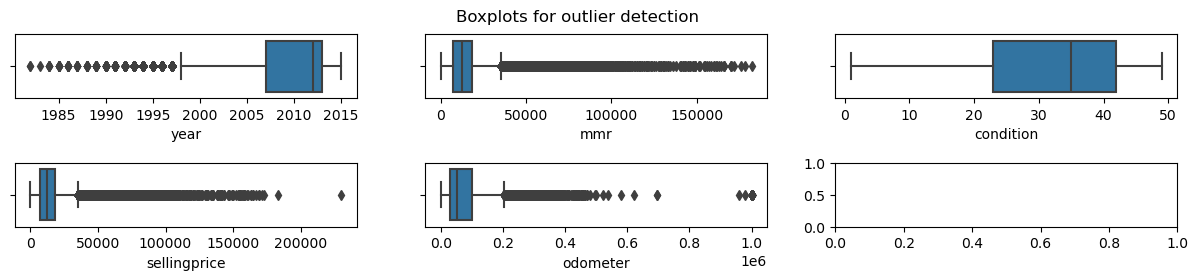

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# create 2 row x 3 column figure
fig, axes = plt.subplots(2, 3, figsize=(15, 2.5))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=df5['year'])
sns.boxplot(ax=axes[0,1], x=df5['mmr'])
sns.boxplot(ax=axes[0,2], x=df5['condition'])

# add spacing between the rows
    # left=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.subplots_adjust(hspace=1
                    # left=0.1,
                    # bottom=0.1, 
                    # right=0.9, 
                    # top=0.9, 
                    # wspace=0.4
                    ) 

sns.boxplot(ax=axes[1,0], x=df5['sellingprice'])
sns.boxplot(ax=axes[1,1], x=df5['odometer'])
plt.show();

> Outliers detected for 
- year
    - cars older than 2000s are outliers
- mmr
    - cars with mmr over 50000 are outliers
- sellingprice
    - cars over 50000
- odometer
    - cars over 200,000

## Data Analysis

### Numerical Variables

#### `Year`(Manufacturing)

Left Skew: -1.18


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


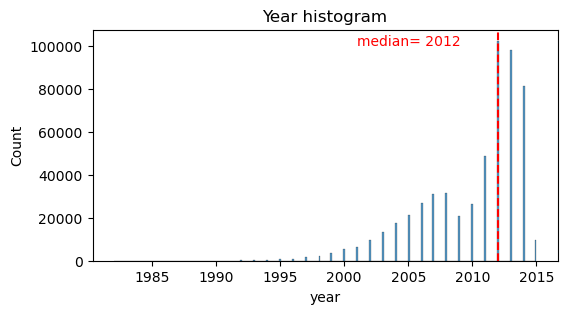

In [77]:
 #Print Skew amount
skew =  round(df5['year'].skew(), 2)
if skew > 0.5:
    print('Right Skew:',skew)
elif skew < -0.5:
    print('Left Skew:',skew)
else:
    print('Normal:',skew)

# plot histogram
plt.figure(figsize=(6,3))
sns.histplot(x=df5['year'])
median = df5['year'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(2001, 100000 ,f'median={median: .0f}', color='red')
plt.title('Year histogram');

> left skewed

> 2012: most cars sold were manufactured in this year, followed by 2013, 2014

> 2015: sharp drop in the sales for cars manufactured in 2015


##### Let's check if we have full year of data for 2015

In [78]:
mask_yr = (df5['year'] == 2015 ) 
df5[mask_yr].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014,None
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014,None
3,2015,volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015,None
5,2015,nissan,Altima,2.5 S,sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue,Dec,30,2014,None
11,2015,kia,optima,LX,sedan,automatic,5xxgm4a73fg353538,ca,48.0,2034.0,red,tan,kia motors finance,15150.0,17700.0,Tue,Dec,16,2014,None


> confirmed we have a full year of data for 2015. This means there's just less cars made in 2015 that were sold. 

> Data timeframe ends in 2015. This means 2015 are new hence less sales?

#### `Condition`

Left Skew: -0.83


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


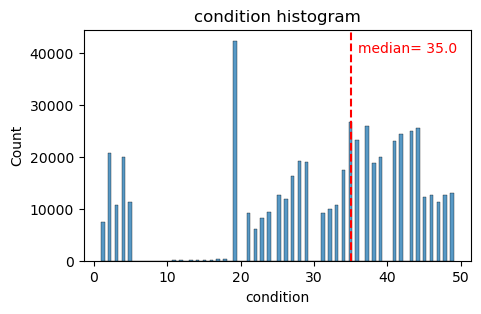

In [79]:
 #Print Skew amount
skew =  round(df5['condition'].skew(), 2)
if skew > 0.5:
    print('Right Skew:',skew)
elif skew < -0.5:
    print('Left Skew:',skew)
else:
    print('Normal:',skew)

# plot histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df5['condition'])
median = df5['condition'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(36, 40000 ,f'median={median: .1f}', color='red')
plt.title('condition histogram');

> conditions range from 10-50, with median at 35.

> counts were somewhat consistent across the board?

#### `mmr` 

Right Skew: 2.0


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


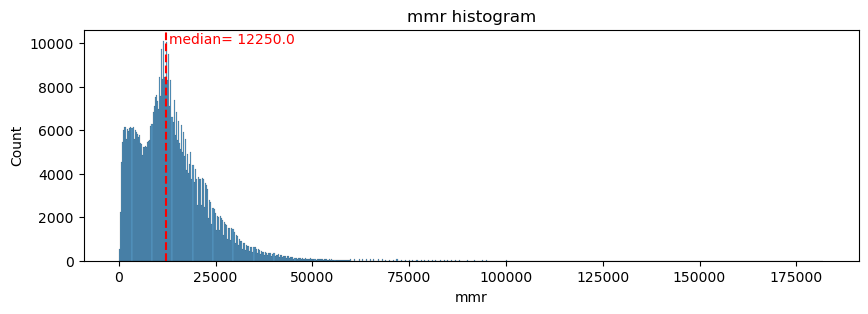

In [80]:
 #Print Skew amount
skew =  round(df5['mmr'].skew(), 2)
if skew > 0.5:
    print('Right Skew:',skew)
elif skew < -0.5:
    print('Left Skew:',skew)
else:
    print('Normal:',skew)

# plot histogram
plt.figure(figsize=(10,3))
sns.histplot(x=df5['mmr'])
median = df5['mmr'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(13000, 10000 ,f'median={median: .1f}', color='red')
plt.title('mmr histogram');

In [81]:
df5[['mmr','sellingprice']].head()

,mmr,sellingprice
0,20500.0,21500.0
1,20800.0,21500.0
2,31900.0,30000.0
3,27500.0,27750.0
4,66000.0,67000.0


#### `sellingprice`

Right Skew: 1.95


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


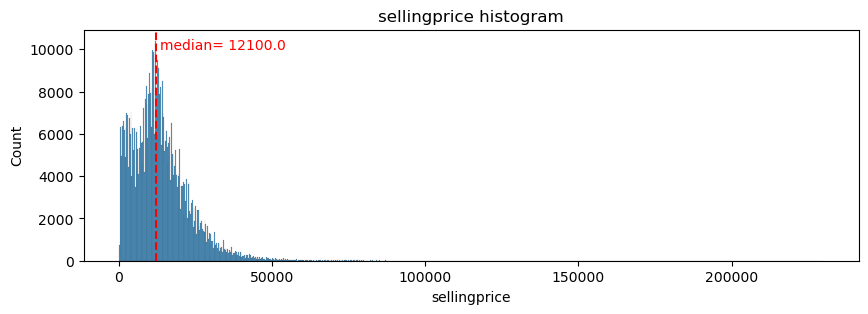

In [82]:
#Print Skew amount
skew =  round(df5['sellingprice'].skew(), 2)
if skew > 0.5:
    print('Right Skew:',skew)
elif skew < -0.5:
    print('Left Skew:',skew)
else:
    print('Normal:',skew)

# plot histogram
plt.figure(figsize=(10,3))
sns.histplot(x=df5['sellingprice'])
median = df5['sellingprice'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(13500, 10000 ,f'median={median: .1f}', color='red')
plt.title('sellingprice histogram');

> selling price plot similar to MMR

In [83]:
# Separate numerical and categorical variables into different df
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
dis_cols = df.select_dtypes(include=['int64']).columns.tolist()
num_cols = df.select_dtypes(include=['float64']).columns.tolist()
print('Categorical Variables:')
print(cat_cols)
print(' ')
print('Continuous Variables:')
print(num_cols)
print(' ')
print('Discrete Variables:')
print(dis_cols)

Categorical Variables:
['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
 
Continuous Variables:
['condition', 'odometer', 'mmr', 'sellingprice']
 
Discrete Variables:
['year']


#### `odometer` 

Right Skew: 1.84


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


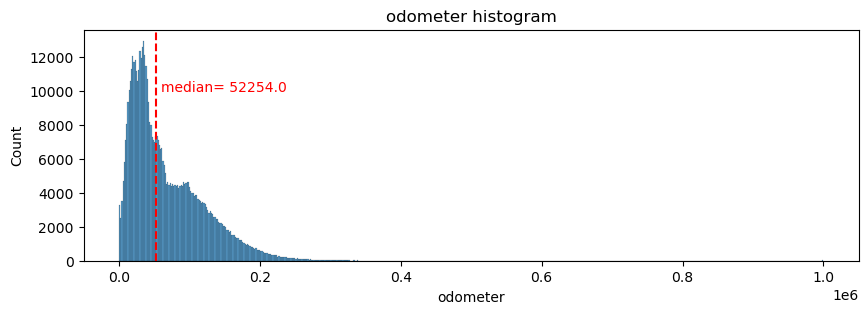

In [84]:
 #Print Skew amount
skew =  round(df5['odometer'].skew(), 2)
if skew > 0.5:
    print('Right Skew:',skew)
elif skew < -0.5:
    print('Left Skew:',skew)
else:
    print('Normal:',skew)

# plot histogram
plt.figure(figsize=(10,3))
sns.histplot(x=df5['odometer'])
median = df5['odometer'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(60000, 10000 ,f'median={median: .1f}', color='red')
plt.title('odometer histogram');

In [85]:
df5[['mmr','sellingprice']].head()

,mmr,sellingprice
0,20500.0,21500.0
1,20800.0,21500.0
2,31900.0,30000.0
3,27500.0,27750.0
4,66000.0,67000.0


### Categorical Variables

#### `make` 

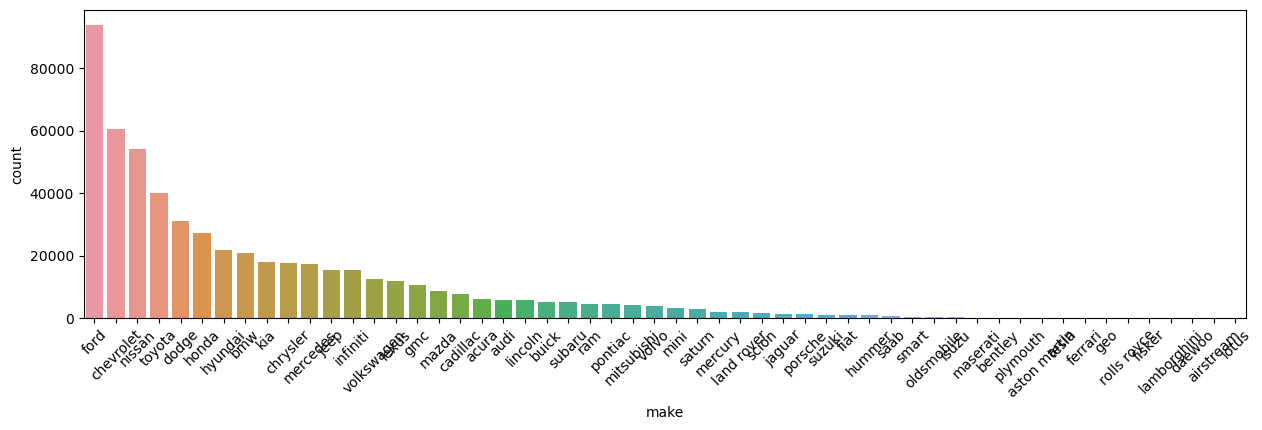

In [86]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['make'],
                   order=df5['make'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['make'].value_counts(ascending=False)
percentage = df5['make'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Highest sales by `make` 

In [87]:
df5['make'].value_counts(normalize=True).head(5)

make
ford         0.171367
chevrolet    0.110454
nissan       0.098475
toyota       0.072859
dodge        0.056436
Name: proportion, dtype: float64

##### Least sold cars by `make` are 
         

In [88]:
df5['make'].value_counts(normalize=True).tail(5)

make
fisker         0.000016
lamborghini    0.000007
daewoo         0.000005
airstream      0.000002
lotus          0.000002
Name: proportion, dtype: float64

#### `model`

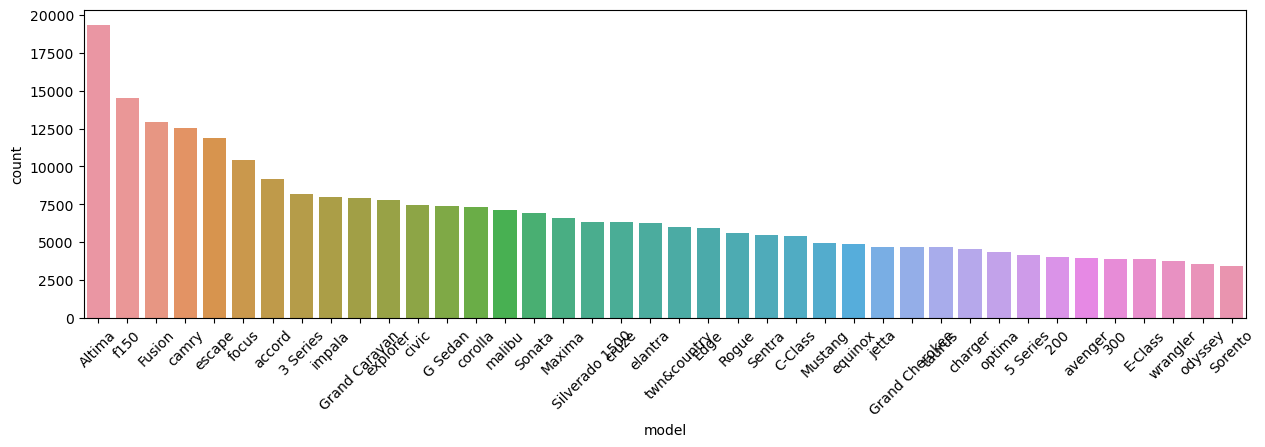

In [89]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['model'],
                   order=df5['model'].value_counts(ascending=False).head(40).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['model'].value_counts(ascending=False)
percentage = df5['model'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Most sold cars by `model` are 

In [90]:
df5['model'].value_counts(normalize=True).head(5)

model
Altima    0.035274
f150      0.026509
Fusion    0.023601
camry     0.022877
escape    0.021681
Name: proportion, dtype: float64

##### Least sold cars by `model` are 

In [91]:
df5['model'].value_counts(normalize=True).tail(5)

model
pt                         0.000002
carrera                    0.000002
Spirit                     0.000002
Continental Supersports    0.000002
458 Italia                 0.000002
Name: proportion, dtype: float64

#### `trim`

##### Most sold cars by `trim` are 

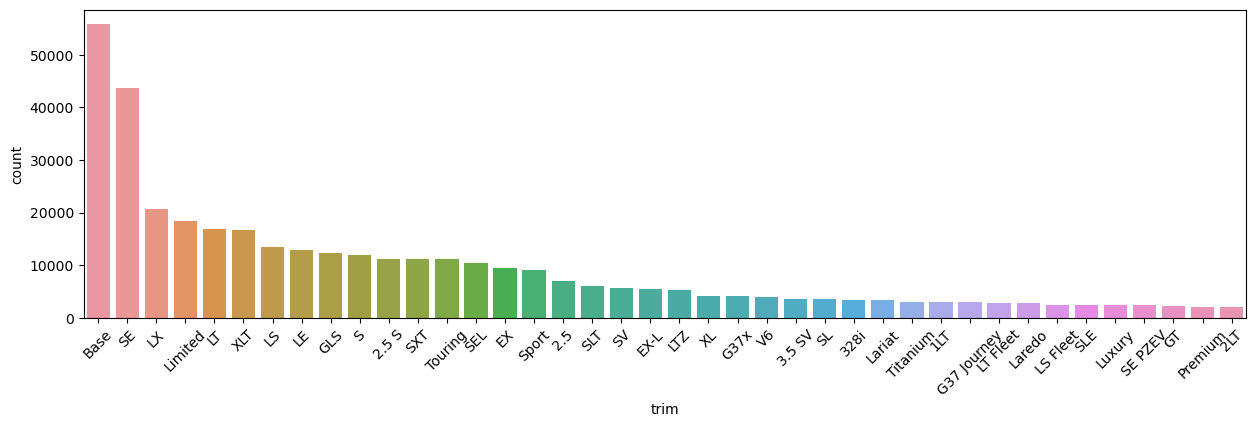

In [92]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['trim'],
                   order=df5['trim'].value_counts(ascending=False).head(40).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['trim'].value_counts(ascending=False)
percentage = df5['trim'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

In [93]:
df5['trim'].value_counts(normalize=True).head(5)

trim
Base       0.101821
SE         0.079623
LX         0.037865
Limited    0.033505
LT         0.030856
Name: proportion, dtype: float64

##### Least sold cars by `trim` are 

In [94]:
df5['trim'].value_counts(normalize=True).tail(5)

trim
gt gt         0.000002
v6            0.000002
awd 2004.5    0.000002
Splash        0.000002
gx            0.000002
Name: proportion, dtype: float64

#### `body`

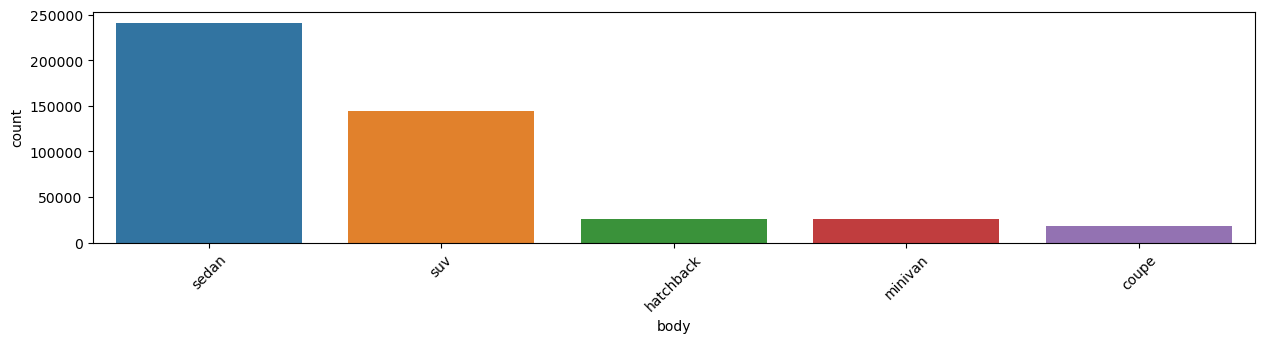

In [95]:
fig = plt.figure(figsize=(15,3))
ax = sns.countplot(x=df5['body'],
                   order=df5['body'].value_counts(ascending=False).head(5).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['body'].value_counts(ascending=False)
percentage = df5['body'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Most sold cars by `body` are 

In [96]:
df5['body'].value_counts(normalize=True).head(5)

body
sedan        0.442358
suv          0.263623
hatchback    0.048085
minivan      0.046787
coupe        0.032534
Name: proportion, dtype: float64

> sedan sales makes up `~44%` of the market 

> suv sales make up `~23%` of the market

##### Least sold cars by `body` are 

In [97]:
df5['body'].value_counts(normalize=True).tail(5)

body
g37 coupe      0.000022
cab plus 4     0.000011
cab plus       0.000007
cts-v wagon    0.000002
ram van        0.000002
Name: proportion, dtype: float64

#### `transmission`

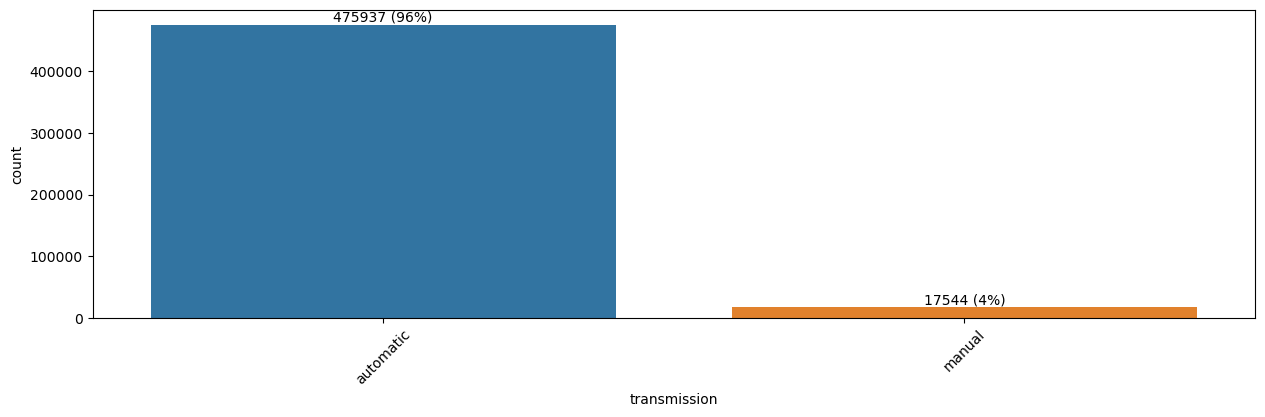

In [98]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['transmission'],
                   order=df5['transmission'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['transmission'].value_counts(ascending=False)
percentage = df5['transmission'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

> 96% of cars sold had auto transmission

#### `state`


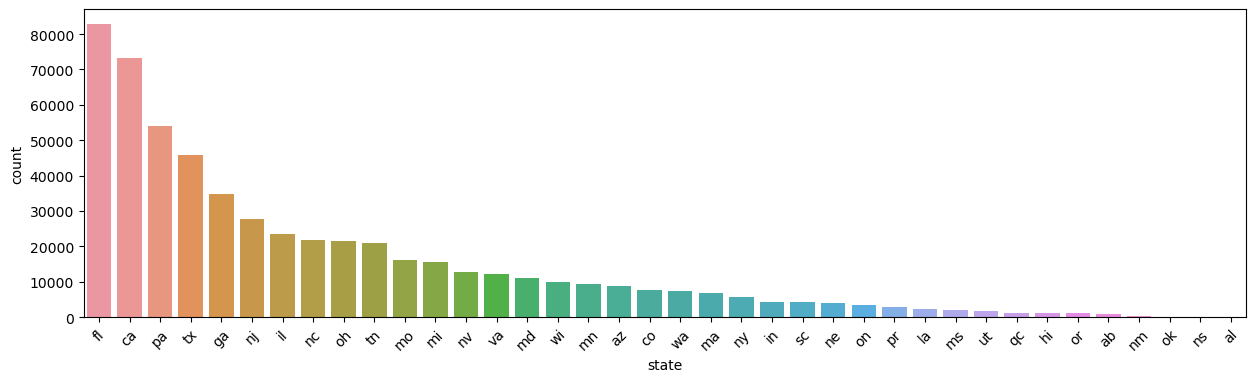

In [99]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['state'],
                   order=df5['state'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['state'].value_counts(ascending=False)
percentage = df5['state'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Most sold cars by `state` are 


In [100]:
df5['state'].value_counts(normalize=True).head(5)

state
fl    0.148431
ca    0.130899
pa    0.096467
tx    0.082162
ga    0.062186
Name: proportion, dtype: float64

##### Least sold cars by `state` are 

In [101]:
df5['state'].value_counts(normalize=True).tail(5)

state
ab    0.001661
nm    0.000306
ok    0.000129
ns    0.000109
al    0.000047
Name: proportion, dtype: float64

#### `color`


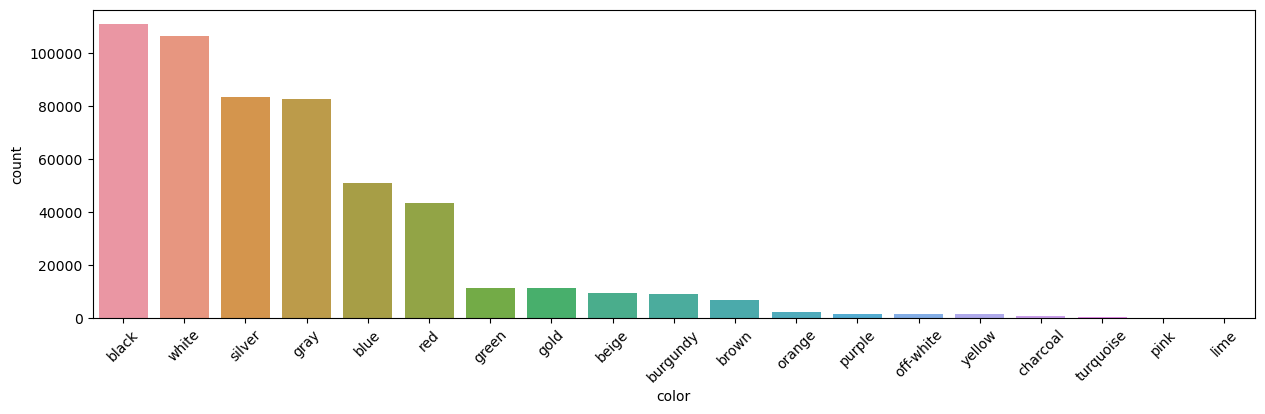

In [102]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['color'],
                   order=df5['color'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['color'].value_counts(ascending=False)
percentage = df5['color'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

##### Most sold cars by `color` are 


In [103]:
df5['color'].value_counts(normalize=True).head(5)

color
black     0.208049
white     0.199994
silver    0.156344
gray      0.155342
blue      0.095883
Name: proportion, dtype: float64

> muted colors are more popular in the market with black and white leading at ~`20%`

##### Least sold cars by `color` are 

In [104]:
df5['color'].value_counts(normalize=True).tail(5)

color
yellow       0.002409
charcoal     0.000898
turquoise    0.000442
pink         0.000079
lime         0.000028
Name: proportion, dtype: float64

#### `interior`


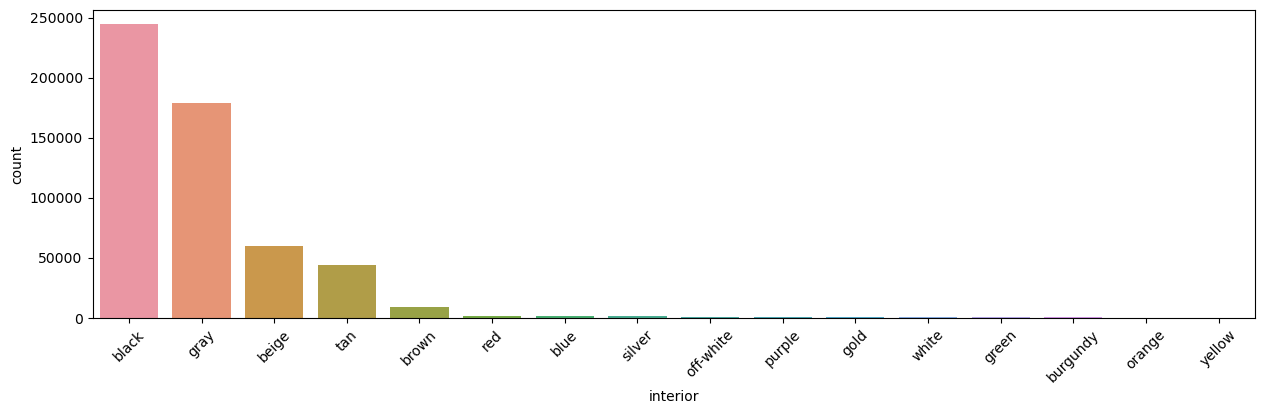

In [105]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['interior'],
                   order=df5['interior'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

# count =df5['interior'].value_counts(ascending=False)
# percentage = df5['interior'].value_counts(ascending=False, normalize=True).values * 100
# lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

> black and gray are most popular colors for interiors

#### `seller`


##### Most sold cars by `seller` are 


In [106]:
df5['seller'].value_counts(normalize=True).head(5)

seller
nissan-infiniti lt               0.035241
ford motor credit company llc    0.034291
the hertz corporation            0.032746
santander consumer               0.027353
avis corporation                 0.022441
Name: proportion, dtype: float64

##### Least sold cars by `seller` are 

In [107]:
df5['seller'].value_counts(normalize=True).tail(5)

seller
first shift auto             0.000002
apple chev olds east         0.000002
storm motors miami llc       0.000002
south atlanta motorsports    0.000002
i -5 uhlmann rv              0.000002
Name: proportion, dtype: float64

#### `sale_weekday`


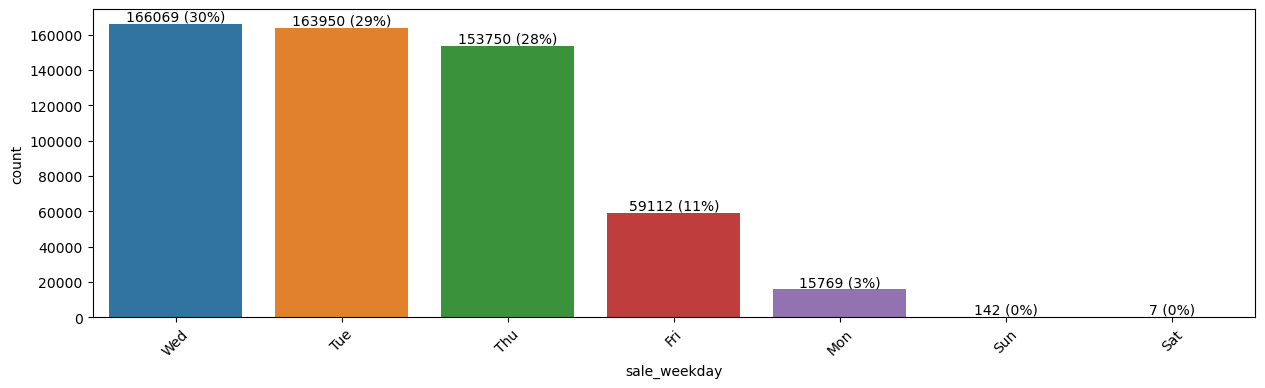

In [108]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['sale_weekday'],
                   order=df5['sale_weekday'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['sale_weekday'].value_counts(ascending=False)
percentage = df5['sale_weekday'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

> most care sales occured on `Wed` > `Tues` > `Thurs`

> Least amount of cars were sold on the weekends.

#### `sale_month`


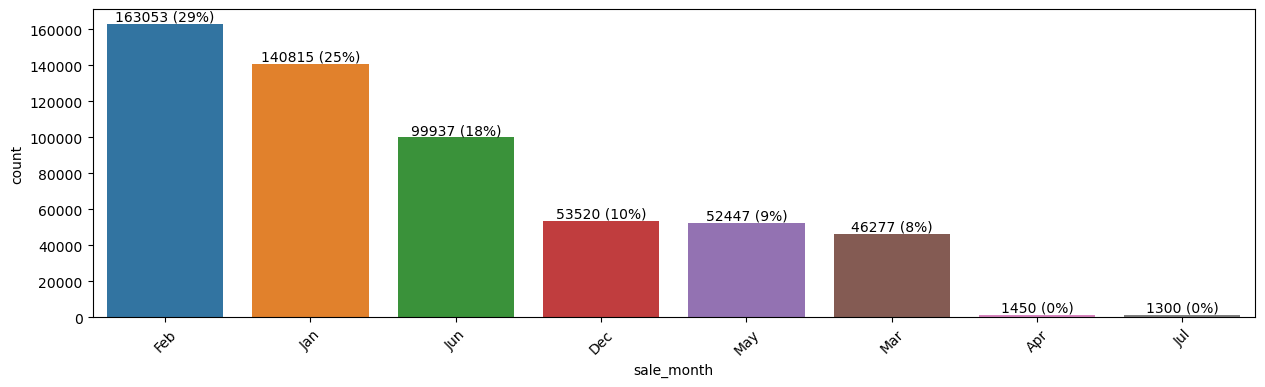

In [109]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['sale_month'],
                   order=df5['sale_month'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['sale_month'].value_counts(ascending=False)
percentage = df5['sale_month'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

> most car sales in `Feb` and least in `Jul`

#### `sale_day`


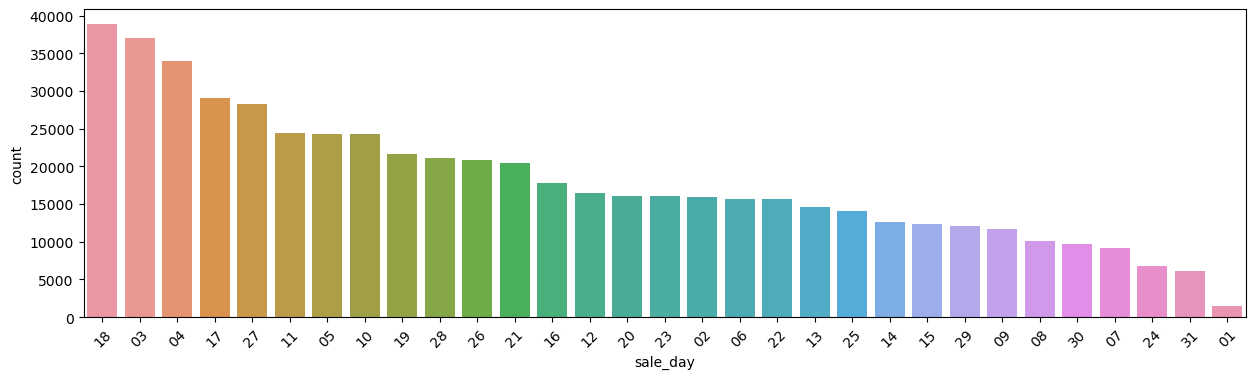

In [110]:
fig = plt.figure(figsize=(15,4))
ax = sns.countplot(x=df5['sale_day'],
                   order=df5['sale_day'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['sale_day'].value_counts(ascending=False)
percentage = df5['sale_day'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

# ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

#### `sale_year`


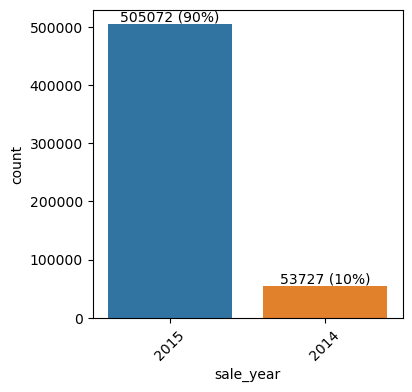

In [111]:
fig = plt.figure(figsize=(4,4))
ax = sns.countplot(x=df5['sale_year'],
                   order=df5['sale_year'].value_counts(ascending=False).index)

plt.xticks(
    rotation=45, 
    # horizontalalignment='right',
    # fontweight='light',
    # fontsize=10  
)

count =df5['sale_year'].value_counts(ascending=False)
percentage = df5['sale_year'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10 )

None

### Bivarate Analysis

#### `Year` vs Selling price

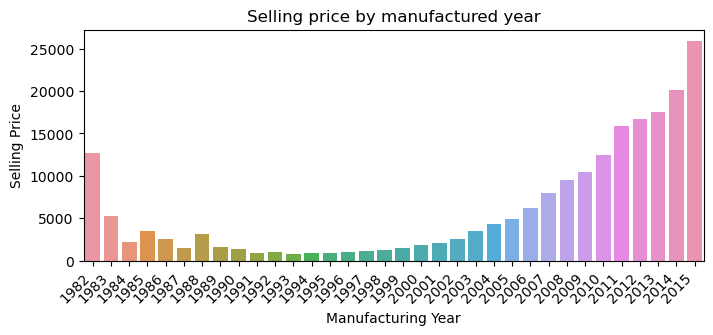

In [112]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 3))

sns.barplot(df5, x="year", y='sellingprice', ax=ax, errorbar=None)
plt.title("Selling price by manufactured year", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("Manufacturing Year")
plt.xticks(rotation=45, ha='right')
plt.show()

> cars manufacturing between 2010-2015 have higher selling price while older cars has less value.

> older cars show lower selling price however, `1982` shows decent selling price. is it vintage? 


In [113]:
df5.loc[df5['year'] == 1982]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode
207920,1982,NaN,NaN,NaN,NaN,automatic,1g1ay0786c5123682,ca,2.0,85738.0,gold,gray,livermore toyota and livermore scion,6175.0,5000.0,Wed,Jan,28,2015,None
530893,1982,NaN,NaN,NaN,NaN,automatic,wdbba45a0cb017970,pa,4.0,18404.0,white,gray,adcock brothers inc,3675.0,20500.0,Thu,Jun,11,2015,None


> data does not show make/model for cars manufactured in `1982`

In [114]:
df5.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'sale_weekday', 'sale_month', 'sale_day', 'sale_year',
       'mode'],
      dtype='object')

#### `Condition` vs Selling price

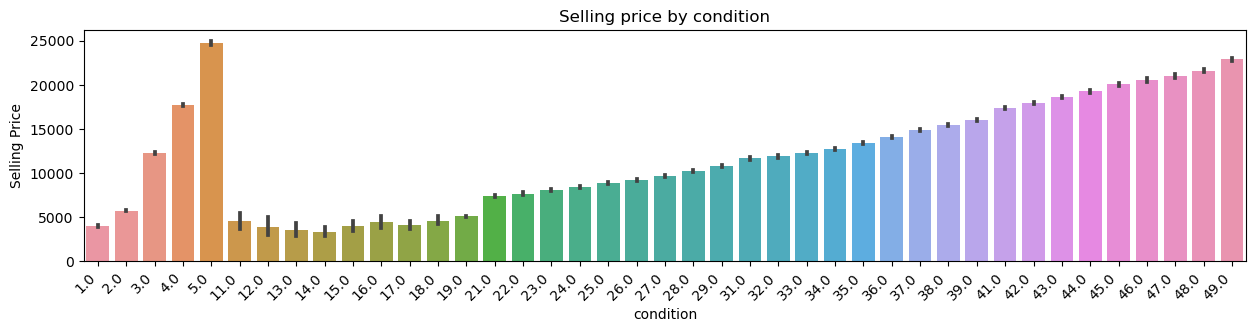

In [115]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 3))

sns.barplot(df5, x="condition", y='sellingprice', ax=ax)
plt.title("Selling price by condition", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("condition")
plt.xticks(rotation=45, ha='right')
plt.show()

In [116]:
df5.loc[df5['condition'] <6].sort_values(by='sellingprice',ascending=False).head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode
283534,2014,bmw,i8,Base,coupe,automatic,wby2z2c57evx64261,fl,5.0,154.0,white,beige,american bank auto liquidators,170000.0,165000.0,Tue,Feb,10,2015,None
146917,2014,bmw,i8,Base,coupe,automatic,wby2z2c59evx64214,ca,5.0,60.0,white,brown,ferrari of orange county,176000.0,165000.0,Thu,Jan,15,2015,None
239357,2014,bmw,i8,Base,coupe,automatic,wby2z2c5xevx64349,fl,5.0,530.0,gray,brown,auto plaza motor sports llc,170000.0,159000.0,Tue,Feb,10,2015,None
301118,2014,bmw,i8,Base,coupe,automatic,wby2z2c50evx64103,ca,5.0,603.0,white,beige,high bid trading co inc,163000.0,158000.0,Thu,Feb,12,2015,None
194738,2010,rolls royce,Ghost,Base,sedan,automatic,sca664s56aux48701,ca,4.0,19836.0,NaN,NaN,financial services remarketing (bmw int),146000.0,154000.0,Wed,Jan,28,2015,None


> in general, cars with higher condition value have higher selling price

> with some exceptions where conditions are 3,4,5. A quick look into these shows the make for these cars are luxury car makers. Makes sense why the car selling price is high despite low condition value

#### `Make` vs Selling price

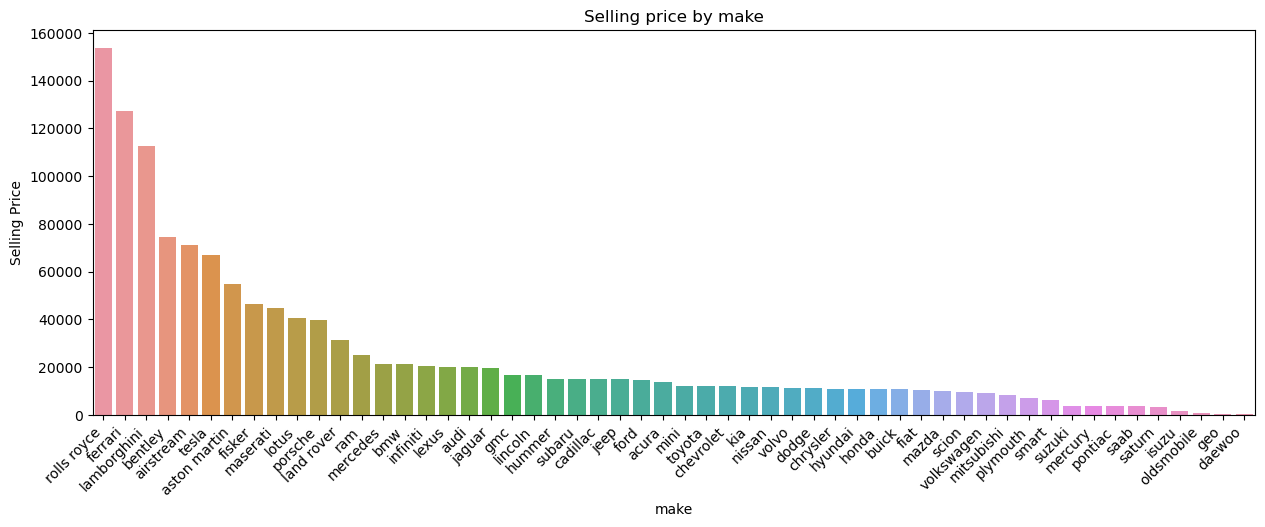

In [117]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15,5))

# define order the graph but also only showing top 50%
order = df5.groupby(["make"])["sellingprice"].mean()[:75].sort_values(ascending=False).index
sns.barplot(df5, x='make', y='sellingprice', ax=ax, errorbar=None, order=order)
plt.title("Selling price by make", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("make")
plt.xticks(rotation=45, ha='right')
plt.show()

> based on average selling price, rolls royce has the highest selling price followed by ferrari and lamborghini

> however, these are luxury makes and not a good representative for comparison across all makes

> should categorize makes by position to get better comparison between similar makes

#### Make Tier

In [118]:
df6=df5.copy()

In [119]:
# create a dictionary of replacements
model_positioning = {'kia':'mass market',
                    'bmw':'premium',
                    'volvo':'premium', 
                    'nissan':'mass market', 
                    'chevrolet':'mass market', 
                    'audi':'premium', 
                    'ford':'mass market',
                    'hyundai':'mass market', 
                    'buick':'semi-premium', 
                    'cadillac':'premium', 
                    'acura':'premium', 
                    'lexus':'premium', 
                    'infiniti': 'premium',
                    'jeep': 'semi-premium', 
                    'mercedes': 'premium', 
                    'mitsubishi': 'mass market', 
                    'mazda': 'mass market', 
                    'mini': 'semi-premium', 
                    'land rover': 'premium',
                    'lincoln': 'premium', 
                    'jaguar': 'premium', 
                    'volkswagen': 'semi-premium', 
                    'toyota': 'mass market', 
                    'subaru': 'semi-premium', 
                    'scion': 'mass market',       
                    'porsche': 'luxury',  
                    'dodge': 'mass market', 
                    'fiat': 'mass market', 
                    'chrysler': 'mass market', 
                    'ferrari': 'top of line', 
                    'honda': 'mass market', 
                    'gmc': 'mass market', 
                    'ram': 'mass market', 
                    'smart': 'semi-premium', 
                    'bentley': 'top of line', 
                    'pontiac': 'mass market', 
                    'saturn': 'mass market', 
                    'maserati': 'luxury',
                    'mercury': 'mass market', 
                    'hummer': 'mass market', 
                    'saab': 'other', 
                    'suzuki': 'mass market', 
                    'oldsmobile': 'other', 
                    'isuzu': 'other',              
                    'geo': 'other', 
                    'rolls royce': 'top of line', 
                    'daewoo': 'other', 
                    'plymouth': 'mass market', 
                    'tesla': 'semi-premium', 
                    'airstream': 'mass market',
                    'aston martin': 'top of line', 
                    'fisker': 'other', 
                    'lamborghini': 'top of line', 
                    'lotus':'semi-premium'
                     }

# replace values using the .map() method
df6['make_tier'] = df6['make'].map(model_positioning).fillna(df6['make'])

# print the DataFrame
df6[['make','make_tier']]

,make,make_tier
0,kia,mass market
1,kia,mass market
2,bmw,premium
3,volvo,premium
4,bmw,premium
...,...,...
529013,volkswagen,semi-premium
529622,volkswagen,semi-premium
548784,volkswagen,semi-premium
551222,volkswagen,semi-premium


In [120]:
df_ver = 'current: df6 = added make_tier column, df5=convert continuous columns back to float. current: df4a = replace missing values for model. df4 = convert "-" in color and interior to nan. df3 = tranmission rows cleaned and added back to df, df2 =dropped rows where transmission = sedan. df1 = split saledate column, cleaned model names, clean body names'

#### `Make Tier` vs Selling price

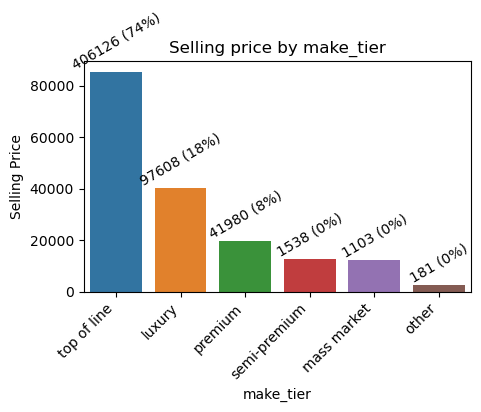

In [121]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(5,3))

# define order the graph but also only showing top 50%
order = df6.groupby(["make_tier"])["sellingprice"].mean().sort_values(ascending=False).index
sns.barplot(df6, x='make_tier', y='sellingprice', ax=ax, errorbar=None, order=order)
plt.title("Selling price by make_tier", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("make_tier")
plt.xticks(rotation=45, ha='right')

count = df6['make_tier'].value_counts(ascending=False)
percentage = df6['make_tier'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(count, percentage)]

ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=10, rotation=30,label_type='edge' )

plt.show()

#### `Model` vs Selling price

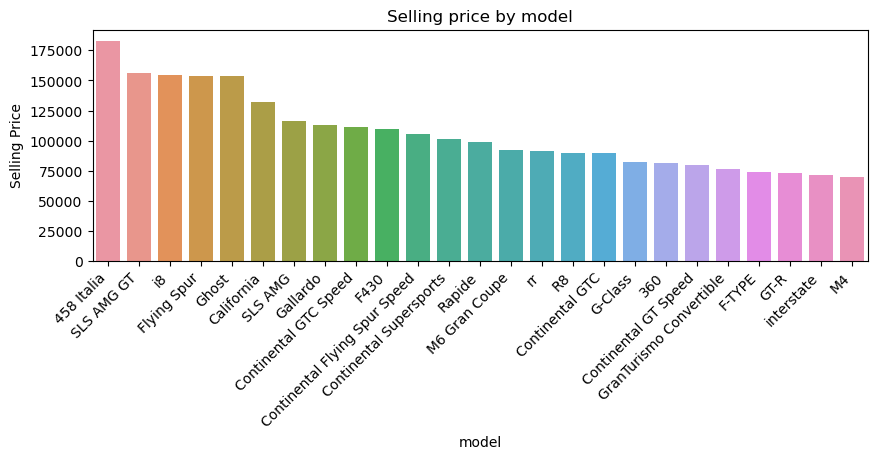

In [122]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,3))

# define order the graph but also only showing top 25 rows
order = df6.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).head(25).index
sns.barplot(df6, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
plt.title("Selling price by model", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

In [123]:
df6.groupby('model')["sellingprice"].mean().sort_values(ascending=False)


model
458 Italia        183000.000000
SLS AMG GT        156500.000000
i8                154222.222222
Flying Spur       154000.000000
Ghost             153488.235294
                      ...      
300e                 300.000000
Spirit               300.000000
Regency              300.000000
Windstar Cargo       281.250000
Paseo                150.000000
Name: sellingprice, Length: 826, dtype: float64

> based on average selling price, 458 Italia model has the highest selling price followed by 360 and 6 series gran coupe.

> however, these are higher tier car models and not a good representative for comparison across all models.

> should categorize models by make_tier to get better comparison between similar models.

#### `Model`/`Make_Tier` vs Selling price

Steps

1. Create a filterd df for each make tier
2. then graph

##### Top of Line 

In [124]:
df_top = df6.loc[df6['make_tier'] == 'top of line']
df_top.head(2)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode,make_tier
1102,2012,ferrari,California,Base,convertible,automatic,zff65tja5c0187066,ca,42.0,10902.0,gray,brown,chicago motor car corporation,149000.0,154000.0,Tue,Dec,30,2014,None,top of line
2584,2010,bentley,Continental GT Speed,Base,coupe,automatic,scbcp7za3ac065778,ca,3.0,15640.0,black,tan,porsche fin svcs dba bentley financial services,93000.0,96000.0,Thu,Dec,18,2014,None,top of line


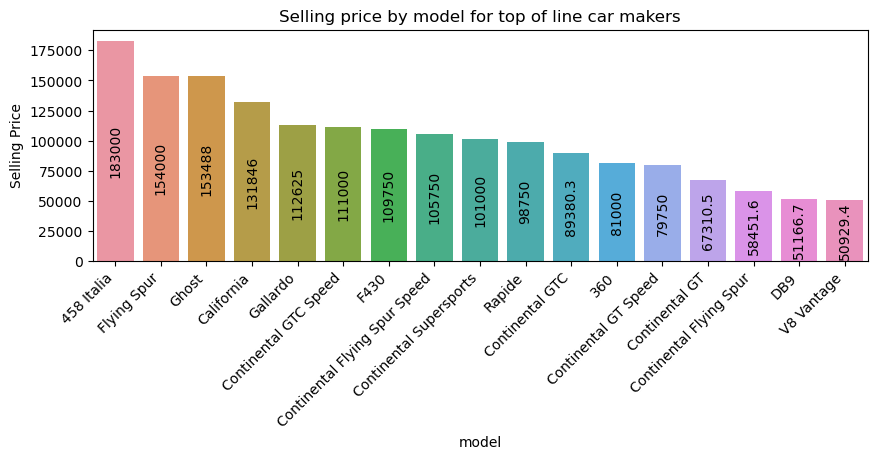

In [125]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,3))

# define order the graph but also only showing top 50%
order = df_top.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).index
sns.barplot(df_top, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for top of line car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

> Top selling models for the top of the line car makers are 
1. 458 Italia - averages 183K
2. Flying Spur
3. Ghost

##### Luxury

In [126]:
df_lux = df6.loc[df6['make_tier'] == 'luxury']
df_lux.head(2)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode,make_tier
592,2013,porsche,Cayenne,Base,suv,automatic,wp1aa2a26dla06093,ca,37.0,15746.0,gray,black,the hertz corporation,49300.0,46500.0,Tue,Dec,16,2014,None,luxury
594,2013,porsche,911,Carrera S,convertible,automatic,wp0cb2a99ds155897,ca,46.0,16868.0,black,black,porsche financial services,80000.0,88500.0,Thu,Dec,18,2014,None,luxury


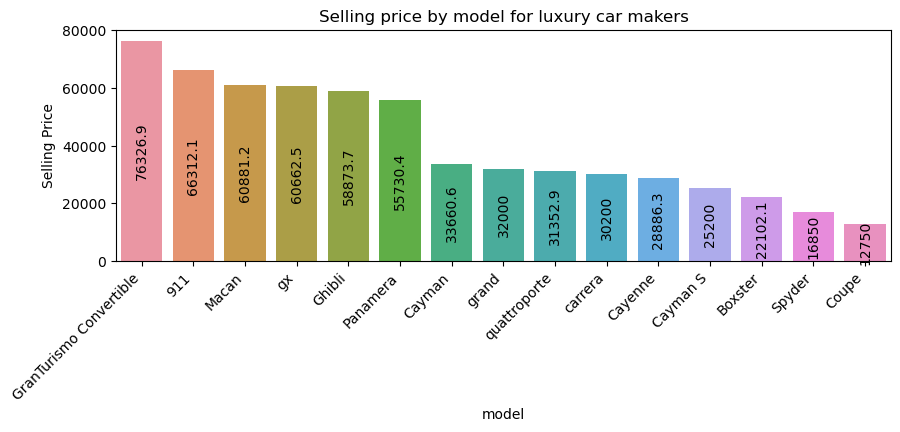

In [127]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,3))

# define order the graph but also only showing top 50%
order = df_lux.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).index
sns.barplot(df_lux, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for luxury car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

> For luxury car makers, top selling models are
1. GranTurismo convertible
2. 911
3. Macan

##### Premium

In [128]:
df_prem = df6.loc[df6['make_tier'] == 'premium']
df_prem.head(2)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode,make_tier
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,15,2015,None,premium
3,2015,volvo,S60,T5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,29,2015,None,premium


In [129]:
df_prem.describe()

,year,condition,odometer,mmr,sellingprice
count,97608.000000,95546.000000,97596.000000,97608.000000,97608.000000
mean,2009.456069,32.590030,65439.521107,19782.815958,19617.908450
std,3.986224,12.391827,50491.704299,12999.264672,12991.042671
min,1986.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,27.000000,27041.000000,9575.000000,9500.000000
50%,2011.000000,36.000000,48405.500000,19650.000000,19400.000000
75%,2012.000000,42.000000,96217.250000,26600.000000,26400.000000
max,2015.000000,49.000000,999999.000000,176000.000000,173000.000000


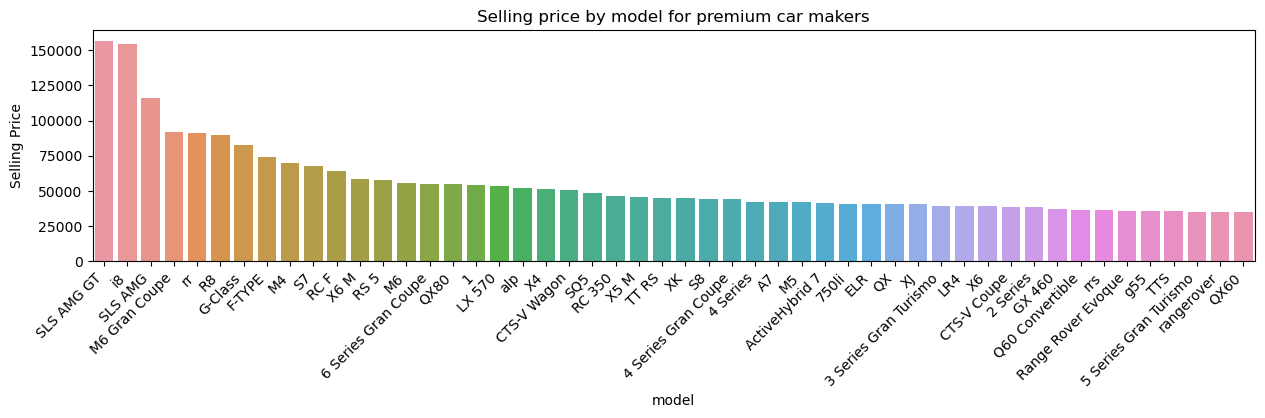

In [130]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15,3))

# define order the graph but also only showing top 50%
order = df_prem.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).head(50).index
sns.barplot(df_prem, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
# ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for premium car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

##### Semi-Premium

In [131]:
df_semi = df6.loc[df6['make_tier'] == 'semi-premium']
df_semi.head(2)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode,make_tier
35,2014,buick,Verano,Convenience Group,sedan,NaN,1g4pr5sk8e4175320,ca,2.0,19531.0,gray,gray,enterprise vehicle exchange / tra / rental / t...,15000.0,9200.0,Tue,Jan,06,2015,None,semi-premium
80,2014,buick,Enclave,Leather Group,suv,automatic,5gakrbkd2ej294045,ca,1.0,14599.0,gray,black,enterprise vehicle exchange / tra / rental / t...,31000.0,24100.0,Tue,Dec,30,2014,None,semi-premium


In [132]:
df_semi.describe()

,year,condition,odometer,mmr,sellingprice
count,41980.000000,40853.000000,41971.000000,41980.000000,41980.000000
mean,2009.788256,30.156047,66543.997808,12671.888399,12539.511029
std,4.022545,14.056815,49124.973801,8203.348344,8337.706172
min,1991.000000,1.000000,1.000000,25.000000,100.000000
25%,2007.000000,22.000000,27875.500000,6100.000000,5900.000000
50%,2011.000000,34.000000,55501.000000,11800.000000,11600.000000
75%,2013.000000,42.000000,97624.500000,17350.000000,17250.000000
max,2015.000000,49.000000,999999.000000,87000.000000,85750.000000


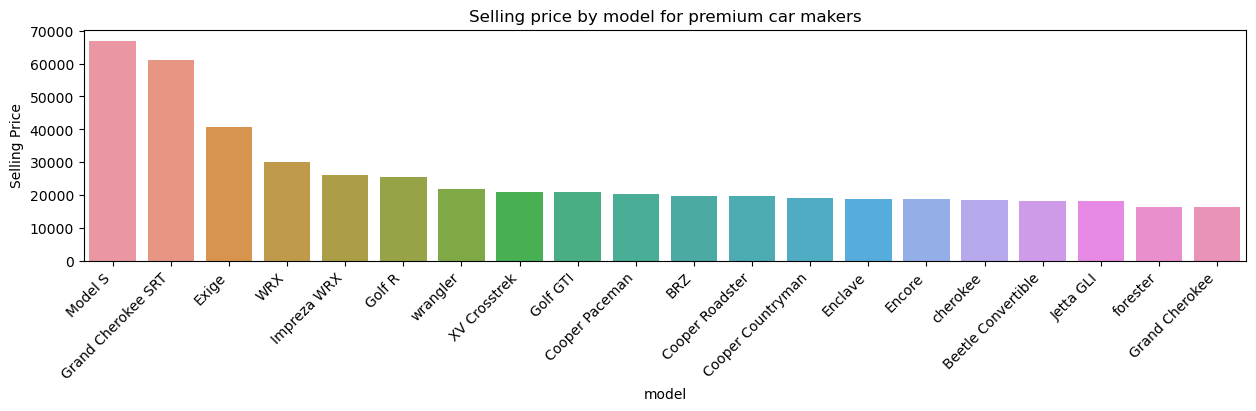

In [133]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15,3))

# define order the graph but also only showing top 50%
order = df_semi.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).head(20).index
sns.barplot(df_semi, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
# ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for premium car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

##### Mass market

In [134]:
df_mass = df6.loc[df6['make_tier'] == 'mass market']
df_mass.head(2)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_weekday,sale_month,sale_day,sale_year,mode,make_tier
0,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,16,2014,None,mass market
1,2015,kia,Sorento,LX,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,16,2014,None,mass market


In [135]:
df_mass.describe()

,year,condition,odometer,mmr,sellingprice
count,406126.000000,397715.000000,406057.000000,406114.000000,406114.000000
mean,2010.330750,30.414498,68060.224537,12452.982291,12293.013036
std,3.839438,13.489879,53806.111051,7699.982956,7820.941724
min,1984.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,23.000000,28435.000000,7050.000000,6800.000000
50%,2012.000000,34.000000,51621.000000,11750.000000,11600.000000
75%,2013.000000,41.000000,98253.000000,16350.000000,16300.000000
max,2015.000000,49.000000,999999.000000,88000.000000,230000.000000


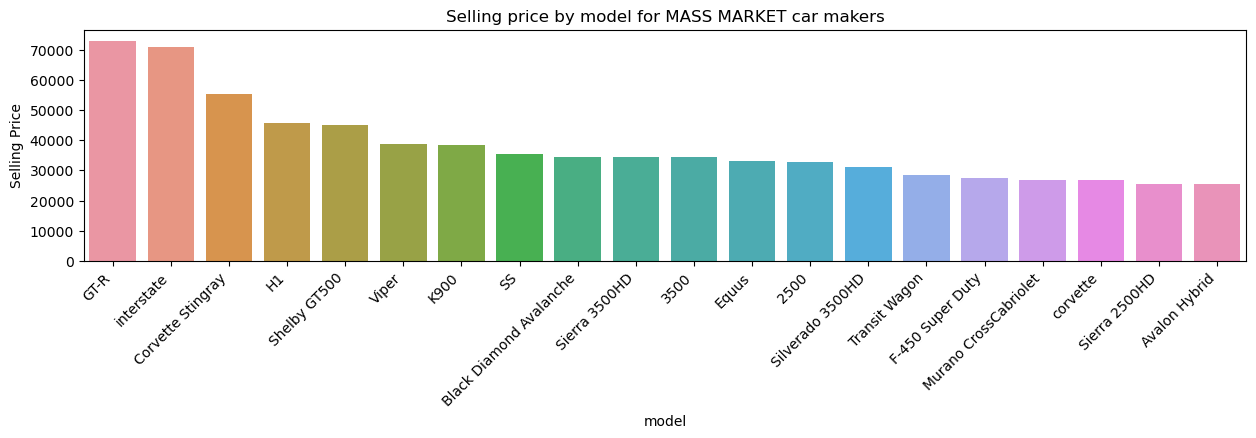

In [136]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15,3))

# define order the graph but also only showing top 50%
order = df_mass.groupby(['model'])["sellingprice"].mean().sort_values(ascending=False).head(20).index
sns.barplot(df_mass, x='model', y='sellingprice', ax=ax, errorbar=None, order=order)
# ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by model for MASS MARKET car makers", fontsize=12)
plt.ylabel("Selling Price")
plt.xlabel("model")
plt.xticks(rotation=45, ha='right')
plt.show()

#### Make Tier Statistics

In [137]:
#calculate the mean selling price by car maker tier
top_mean = round(df_top['sellingprice'].mean(),0)
lux_mean = round(df_lux['sellingprice'].mean(),0)
pre_mean = round(df_prem['sellingprice'].mean(),0)
semi_mean = round(df_semi['sellingprice'].mean(),0)
mass_mean = round(df_mass['sellingprice'].mean(),0)


print('Mean selling price by car maker tier')
print('Top of Line: ', top_mean)
print('Luxury: ', lux_mean)
print('Premium: ', pre_mean)
print('Semi-premium: ', semi_mean)
print('Mass market: ', mass_mean)

print('')

top_count =df_top.shape[0]
lux_count =df_lux.shape[0]
pre_count =df_prem.shape[0]
semi_count =df_semi.shape[0]
mass_count =df_mass.shape[0]

print('Count of cars by car maker tier')
print('Top of Line: ', top_count)
print('Luxury: ', lux_count)
print('Premium: ', pre_count)
print('Semi-premium: ', semi_count)
print('Mass market: ', mass_count)
print('')

top_sum = round(df_top['sellingprice'].sum(),0)
lux_sum =  round(df_lux['sellingprice'].sum(),0)
pre_sum = round(df_prem['sellingprice'].sum(),0)
semi_sum = round(df_semi['sellingprice'].sum(),0)
mass_sum =  round(df_mass['sellingprice'].sum(),0)

print('Sum selling price by car maker tier')
print('Top of Line: ', top_sum)
print('Luxury: ', lux_sum)
print('Premium: ', pre_sum)
print('Semi-premium: ', semi_sum)
print('Mass market: ',mass_sum)



Mean selling price by car maker tier
Top of Line:  85490.0
Luxury:  40294.0
Premium:  19618.0
Semi-premium:  12540.0
Mass market:  12293.0

Count of cars by car maker tier
Top of Line:  181
Luxury:  1538
Premium:  97608
Semi-premium:  41980
Mass market:  406126

Sum selling price by car maker tier
Top of Line:  15473750.0
Luxury:  61972601.0
Premium:  1914864808.0
Semi-premium:  526408673.0
Mass market:  4992364696.0


In [138]:
top_mean/mass_mean

6.954364272350118

In [139]:
mass_sum/top_sum

322.63444194199855

In [140]:
mass_sum/(top_sum+lux_sum+pre_sum+semi_sum)

1.982104016720189

> On average, top of the line cars sells 6x more than mass market cars

> however, there are more mass market cars than top of the line cars; therfore the overall sales genrated from mass market cars is more than 300x that of top of the line cars

> sales of mass market cars are still 2x more than all other tiers combined


#### `Odometer` vs Selling price

##### Group odometer into bins

In [141]:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
df6['odometer_bins'] = pd.cut(df6['odometer'], bins=interval_range, labels=[1,2,3])
df6[['odometer','odometer_bins']]

,odometer,odometer_bins
0,16639.0,"(10000, 20000]"
1,9393.0,"(0, 10000]"
2,1331.0,"(0, 10000]"
3,14282.0,"(10000, 20000]"
4,2641.0,"(0, 10000]"
...,...,...
529013,5705.0,"(0, 10000]"
529622,18561.0,"(10000, 20000]"
548784,2846.0,"(0, 10000]"
551222,9562.0,"(0, 10000]"


c:\Users\tunhi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


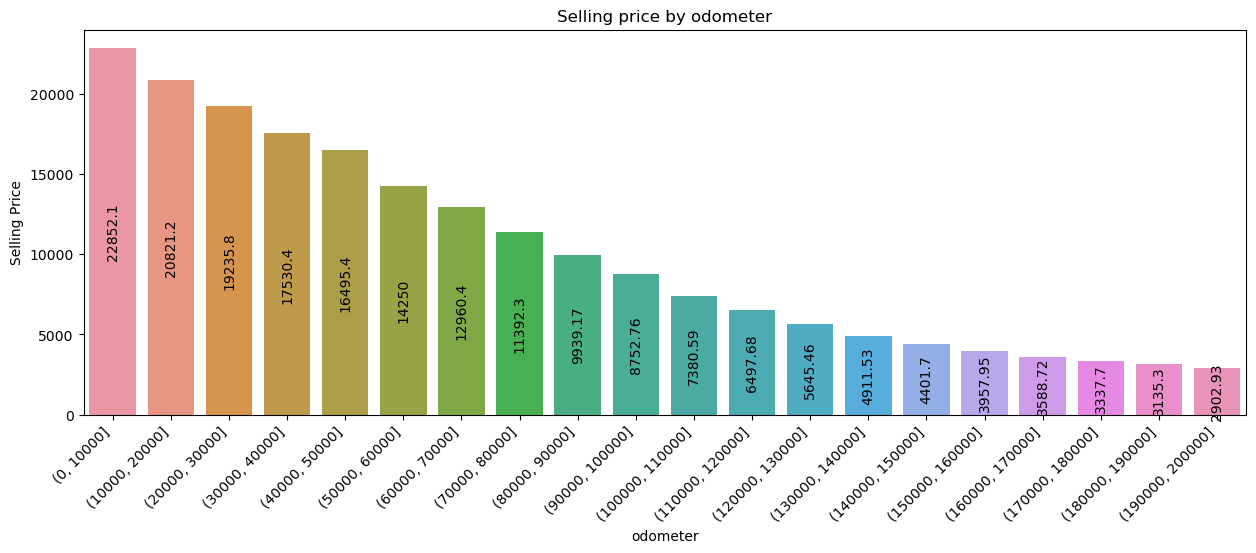

In [142]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.barplot(df6, x="odometer_bins", y='sellingprice', ax=ax, errorbar=None)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by odometer", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("odometer")
plt.xticks(rotation=45, ha='right')
plt.show()



> average selling price is highest when vehicle's odometer is less than 10000

#### Day vs selling price

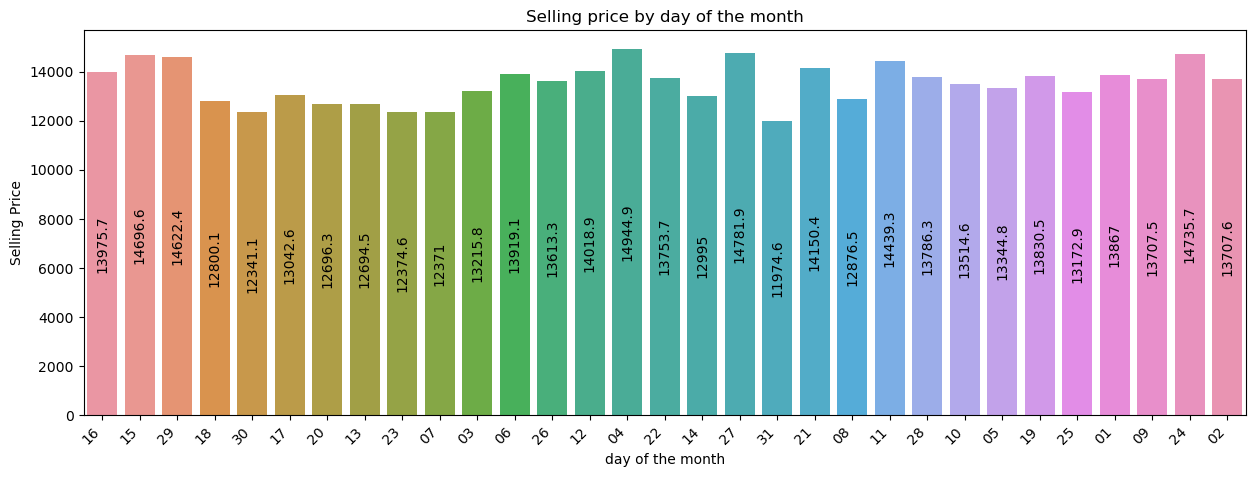

In [143]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df6.groupby(['sale_day'])["sellingprice"].mean().sort_values(ascending=False).index
ax = sns.barplot(df6, x="sale_day", y='sellingprice', ax=ax, errorbar=None)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by day of the month", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("day of the month")
plt.xticks(rotation=45, ha='right')
plt.show()



> no major standout when filtering average selling price by day of the month

#### Month vs selling price

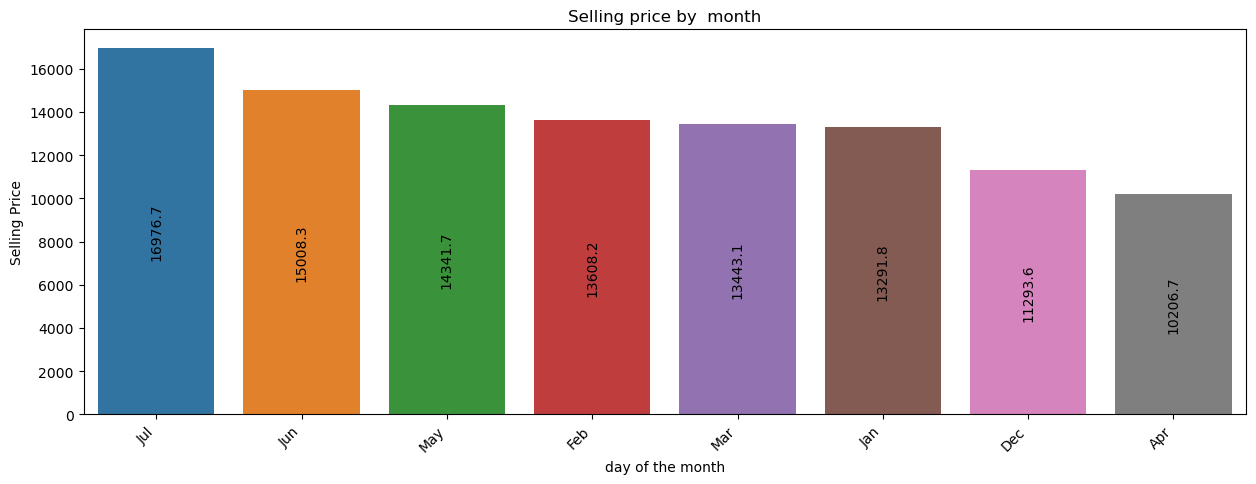

In [144]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df6.groupby(['sale_month'])["sellingprice"].mean().sort_values(ascending=False).index
ax = sns.barplot(df6, x="sale_month", y='sellingprice', ax=ax, errorbar=None, order=order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by  month", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("day of the month")
plt.xticks(rotation=45, ha='right')
plt.show()



> Jul is the month with highest average selling price yet it was the month with least number of sales

#### State vs selling price

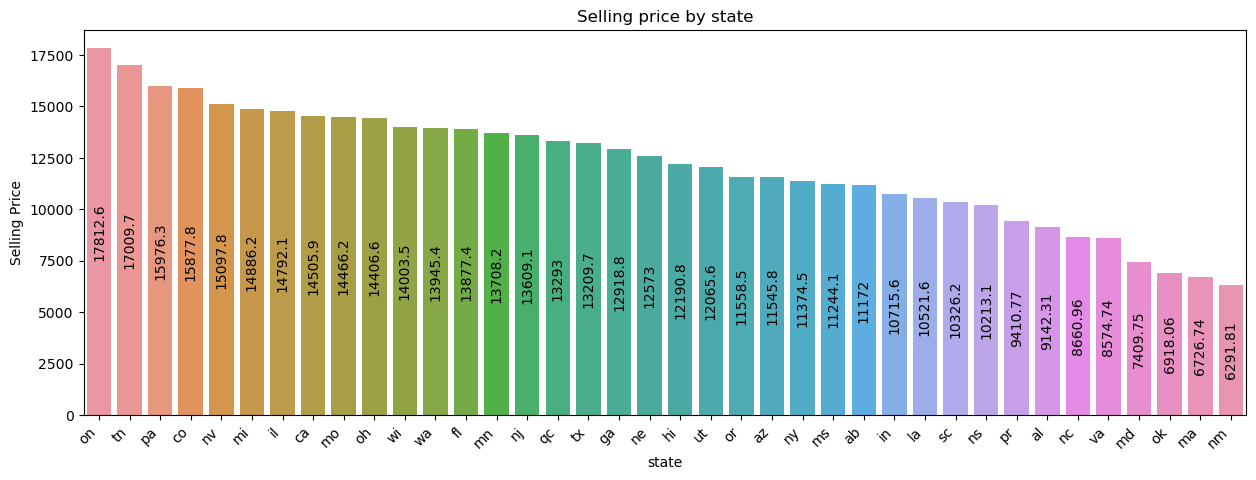

In [145]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
order = df6.groupby(['state'])["sellingprice"].mean().sort_values(ascending=False).index
ax = sns.barplot(df6, x="state", y='sellingprice', ax=ax, errorbar=None, order =order)
ax.bar_label(container=ax.containers[0], fontsize=10, rotation=90, label_type='center' )
plt.title("Selling price by state", fontsize=12);
plt.ylabel("Selling Price")
plt.xlabel("state")
plt.xticks(rotation=45, ha='right')
plt.show()



> Ontario has the highest average selling price followed by tennesee and pennsylvania

# TASKS

- [x] convert `saledate` column
- [x] for `make` column : clean duplicate names, and rename some
- [x] for `body` column : clean duplicate names, and rename some
- [x] for `transmission` column : sedan is incorrect type, maybe change to NaN
- [x] for `state` column : data errors
    - [x] search for entries starting with `3vwd17a`
- [x] for `color` column : there are entries that are numeric, convert to text
- [x] for `interior` & `color` column : convert `-` to NaN?
- [] `trim` has entries = `!`, explore and clean 